In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.scimath import sqrt as csqrt
import warnings
warnings.filterwarnings("ignore")

# Week 1

## Theoretical results

In [2]:
L = 1e-3
r_max = 0.8
lambda_ress = 1550e-9
neff = 1.447

c = 299792458
dlambda = np.linspace(lambda_ress - 2e-9, lambda_ress + 2e-9, 40000)

av_sigma = 0

dneff ac = 0.000712261337882327
dneff dc = 0.0


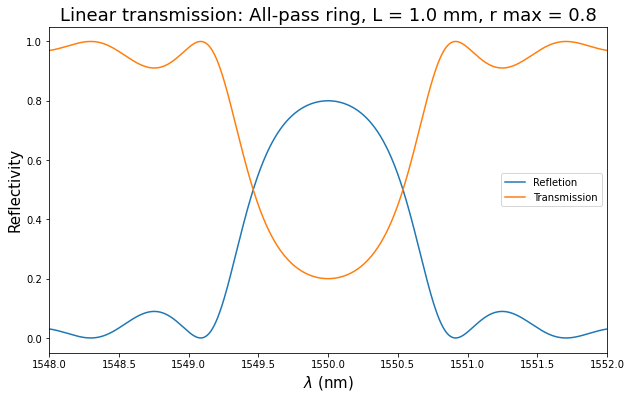

In [7]:
drc_delta = 2*np.pi*neff*((1/dlambda)-(1/lambda_ress))
sigma = av_sigma + drc_delta
# rmax = tanh²(kappa*L)
kappa = np.arctanh(np.sqrt(r_max))/L
# r = sinh²(srqt(kappa² - sigma²)*L)/(cosh²(srqt(kappa² - sigma²)*L) - (sigma²/kappa²))
refl = (np.sinh(csqrt(kappa**2 - sigma**2)*L)**2) / ((np.cosh(csqrt(kappa**2 - sigma**2)*L)**2) - ((sigma**2)/(kappa**2)))


dneff_ac = kappa*lambda_ress/np.pi
print('dneff ac = ' + str(dneff_ac))
dneff_dc = av_sigma*lambda_ress/(2*np.pi)
print('dneff dc = ' + str(dneff_dc))


plt.figure(figsize = (10, 6))
plt.plot(dlambda*1e9, refl)
plt.plot(dlambda*1e9, 1-refl)
# plt.axhline(y = 10*np.log10(1/2))
plt.xlim(1548,1552)
plt.xlabel('$\lambda$ (nm)',fontsize =15)
plt.ylabel('Reflectivity',fontsize =15)
plt.title(r'Linear transmission: All-pass ring, L = {} mm, r max = {}'.format(L*1e3,r_max),fontsize =18)
plt.legend(['Refletion','Transmission'])

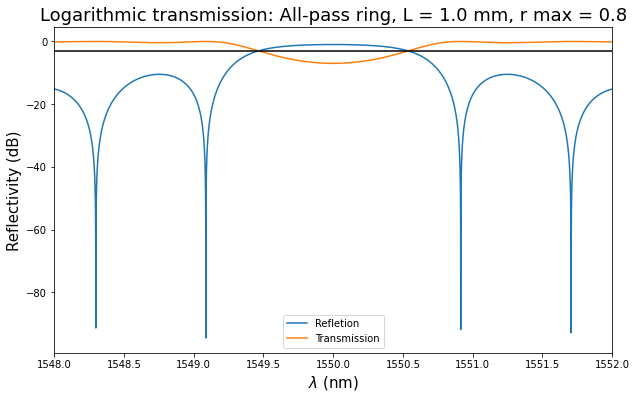

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(dlambda*1e9, 10*np.log10(refl))
plt.plot(dlambda*1e9, 10*np.log10(1-refl))
plt.axhline(y = 10*np.log10(1/2), color = 'black')
plt.xlim(1548,1552)
plt.xlabel('$\lambda$ (nm)',fontsize =15)
plt.ylabel('Reflectivity (dB)',fontsize =15)
plt.title(r'Logarithmic transmission: All-pass ring, L = {} mm, r max = {}'.format(L*1e3,r_max),fontsize =18)
plt.legend(['Refletion','Transmission'])

L = 0.002, r_max = 0.1:
dneff ac = 8.077873054098734e-05
dneff dc = 0.0

L = 0.004, r_max = 0.1:
dneff ac = 4.038936527049367e-05
dneff dc = 0.0

L = 0.002, r_max = 0.4:
dneff ac = 0.0001839070603489284
dneff dc = 0.0

L = 0.004, r_max = 0.4:
dneff ac = 9.19535301744642e-05
dneff dc = 0.0

L = 0.002, r_max = 0.75:
dneff ac = 0.0003248805566662116
dneff dc = 0.0

L = 0.004, r_max = 0.75:
dneff ac = 0.0001624402783331058
dneff dc = 0.0



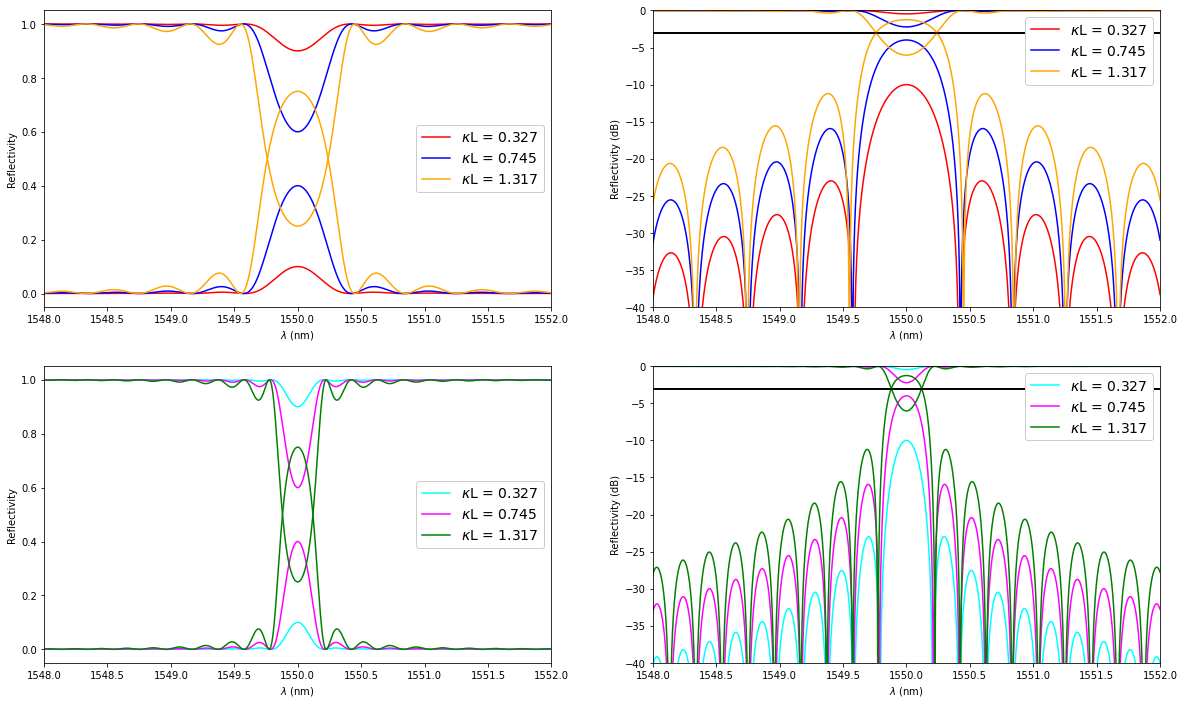

In [8]:
L_range = [2e-3, 4e-3]
r_max_range = [0.1, 0.4, 0.75]
colors = ['red', 'cyan', 'blue', 'magenta', 'orange', 'green']
j = 0

fig12, ax = plt.subplots(2, 2, figsize=(20,12))
for r_max in r_max_range:
  for i in range(2):
    L = L_range[i]

    drc_delta = 2*np.pi*neff*((1/dlambda)-(1/lambda_ress))
    sigma = av_sigma + drc_delta
    # rmax = tanh²(kappa*L)
    kappa = np.arctanh(np.sqrt(r_max))/L

    print('L = ' + str(L) + ', r_max = ' + str(r_max) + ':')
    dneff_ac = kappa*lambda_ress/np.pi
    print('dneff ac = ' + str(dneff_ac))
    dneff_dc = av_sigma*lambda_ress/(2*np.pi)
    print('dneff dc = ' + str(dneff_dc) + '\n')

    # r = sinh²(srqt(kappa² - sigma²)*L)/(cosh²(srqt(kappa² - sigma²)*L) - (sigma²/kappa²))
    refl = (np.sinh(csqrt(kappa**2 - sigma**2)*L)**2) / ((np.cosh(csqrt(kappa**2 - sigma**2)*L)**2) - ((sigma**2)/(kappa**2)))

    ax[i][0].plot(dlambda*1e9,refl, label = '$\kappa$'+'L = '+str(round(kappa*L, 3)), color = colors[j])
    ax[i][0].plot(dlambda*1e9,1-refl, color = colors[j])
    ax[i][0].set_xlabel('$\lambda$ (nm)')
    ax[i][0].set_ylabel('Reflectivity')
    ax[i][0].set_xlim([1548, 1552])
    ax[i][0].legend(framealpha = 1, fontsize = 14)

    ax[i][1].plot(dlambda*1e9,10*np.log10(refl), label = '$\kappa$'+'L = '+str(round(kappa*L, 3)), color = colors[j])
    ax[i][1].plot(dlambda*1e9,10*np.log10(1-refl), color = colors[j])
    ax[i][1].axhline(y = 10*np.log10(1/2), color = 'black')
    ax[i][1].set_xlim([1548, 1552])
    ax[i][1].set_ylim([-40, 0])
    ax[i][1].set_xlabel('$\lambda$ (nm)')
    ax[i][1].set_ylabel('Reflectivity (dB)')
    ax[i][1].legend(framealpha = 1, fontsize = 14)
    j = j + 1

## INTERCONNECT simulation

In [ ]:
import os
import imp
import sys
import importlib.util

spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
lumapi = importlib.util.module_from_spec(spec_win)
os.add_dll_directory("C:/Program Files/Lumerical/v202/api/python")
sys.path.append(os.path.dirname("C:/Users/Victor Hugo/Desktop/i'm a robot/aulas/p8/temporario"))
spec_win.loader.exec_module(lumapi)

In [ ]:
bragg = lumapi.INTERCONNECT(filename='bragg_tests.icp', hide=False) 

: 

: 

###### Failed to open INTERCONNECT through VSCode, so initially I'll do it manually

In [ ]:
# L = 1e-3
# r_max = 0.8


In [ ]:
# L = 2e-3
# r_max = 0.4

# Week 2

In [2]:
import os
import imp
import sys
import pandas as pd
from IPython.display import display, Math

###############################################################
# LINUX PATH

sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname("/home/trainner/Documentos/Vh/braggs-grating-photonics/simulation")) #Current directory

In [219]:
bragg = lumapi.MODE(filename='simulations_MODE.lms')

## retangular, width = 450 nm

### Theoretical values

In [4]:
lamb = 1530e-9
Dlamb = 25e-9
neff = 2.272
ng = 4.596
c = 299792458
dlambda = np.linspace(lamb - 2e-9, lamb + 2e-9, 40000)

In [5]:
period = lamb/(2*neff)
N = 120
length = period*N
print("period = " + str(period*1e9) + " nm")
kappa = np.sqrt((np.pi*ng*Dlamb/(lamb**2))**2 - (np.pi/length)**2)
print("kappa = " + str(kappa))
r_max = np.tanh(kappa*length)**2
print("r_max = " + str(r_max))
dneff = lamb*kappa/2
print("dneff = " + str(dneff))

period = 336.7077464788733 nm
kappa = 133163.23995736433
r_max = 0.9999151521350916
dneff = 0.1018698785673837


In [6]:
L = 1e-3
r_max = 0.8
lambda_ress = 1550e-9
neff = 1.447

c = 299792458
dlambda = np.linspace(lambda_ress - 2e-9, lambda_ress + 2e-9, 40000)

av_sigma = 0

dneff ac = 0.000712261337882327
dneff dc = 0.0


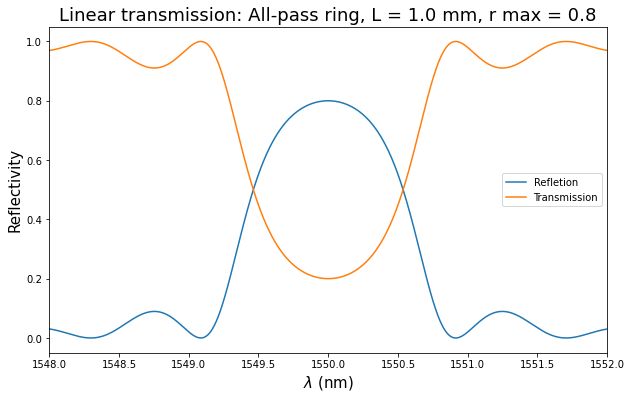

In [7]:
drc_delta = 2*np.pi*neff*((1/dlambda)-(1/lambda_ress))
sigma = av_sigma + drc_delta
# rmax = tanh²(kappa*L)
kappa = np.arctanh(np.sqrt(r_max))/L
# r = sinh²(srqt(kappa² - sigma²)*L)/(cosh²(srqt(kappa² - sigma²)*L) - (sigma²/kappa²))
refl = (np.sinh(csqrt(kappa**2 - sigma**2)*L)**2) / ((np.cosh(csqrt(kappa**2 - sigma**2)*L)**2) - ((sigma**2)/(kappa**2)))


dneff_ac = kappa*lambda_ress/np.pi
print('dneff ac = ' + str(dneff_ac))
dneff_dc = av_sigma*lambda_ress/(2*np.pi)
print('dneff dc = ' + str(dneff_dc))


plt.figure(figsize = (10, 6))
plt.plot(dlambda*1e9, refl)
plt.plot(dlambda*1e9, 1-refl)
# plt.axhline(y = 10*np.log10(1/2))
plt.xlim(1548,1552)
plt.xlabel('$\lambda$ (nm)',fontsize =15)
plt.ylabel('Reflectivity',fontsize =15)
plt.title(r'Linear transmission: All-pass ring, L = {} mm, r max = {}'.format(L*1e3,r_max),fontsize =18)
plt.legend(['Refletion','Transmission'])

### MODE simulations

In [255]:
Altura = 220e-9
Largura = 450e-9
periodo = 336.7e-9
dLarg = 50e-9
material = "Si (Silicon) - palik"
type2 = 1

In [30]:
nSimu = 6
deltaLarg = np.linspace(000e-9, 250e-9, nSimu)

# bragg.setnamed("structure group", "dLarg", deltaLarg[i])


In [34]:
deltaNeff = np.zeros(nSimu)
for i in range(nSimu):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "dLarg", deltaLarg[i])
    bragg.setnamed("FDE", "x", periodo/8)
    bragg.findmodes()
    deltaNeff[i] = np.real(bragg.getdata('FDE::data::mode1','neff'))
    
    bragg.switchtolayout()
    bragg.setnamed("FDE", "x", periodo/2)
    bragg.findmodes()
    deltaNeff[i] = deltaNeff[i] - np.real(bragg.getdata('FDE::data::mode1','neff'))
    print("Completed: " + str(i+1) + "/" + str(nSimu))



Completed: 0/6
Completed: 1/6
Completed: 2/6
Completed: 3/6


LumApiError: "in getdata, the d-card named FDE::data::mode1 was not found.\n  Try the command '?getdata;' to see which d-cards are available."

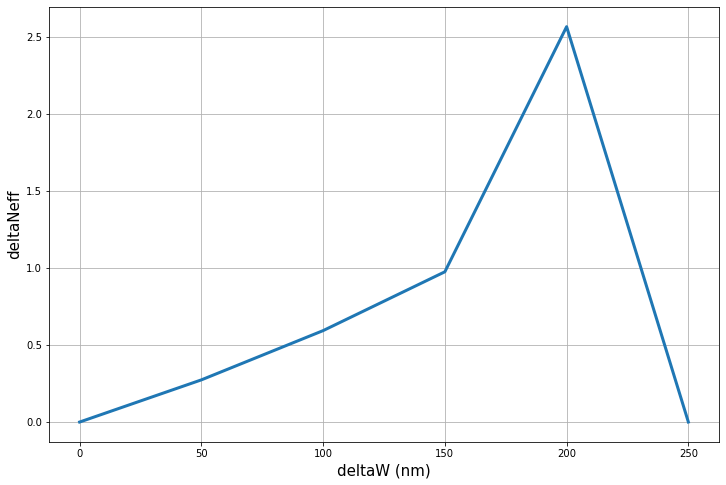

In [38]:

plt.figure(figsize = (12,8))
plt.plot(deltaLarg*1e9, deltaNeff, linewidth = 3)
# plt.ylim(-1, 0)
plt.xlabel('deltaW (nm)', fontsize = 15)
plt.ylabel('deltaNeff', fontsize = 15)
plt.grid(True)
plt.show()
# plt.savefig('Imagens/Loss x Box span')


In [39]:
nSimu = 11
deltaLarg = np.linspace(000e-9, 50e-9, nSimu)

# bragg.setnamed("structure group", "dLarg", deltaLarg[i])
deltaNeff = np.zeros(nSimu)
for i in range(nSimu):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "dLarg", deltaLarg[i])
    bragg.setnamed("FDE", "x", periodo/8)
    bragg.findmodes()
    deltaNeff[i] = np.real(bragg.getdata('FDE::data::mode1','neff'))
    
    bragg.switchtolayout()
    bragg.setnamed("FDE", "x", periodo/2)
    bragg.findmodes()
    deltaNeff[i] = deltaNeff[i] - np.real(bragg.getdata('FDE::data::mode1','neff'))
    print("Completed: " + str(i+1) + "/" + str(nSimu))


Completed: 0/11
Completed: 1/11
Completed: 2/11
Completed: 3/11
Completed: 4/11
Completed: 5/11
Completed: 6/11
Completed: 7/11
Completed: 8/11
Completed: 9/11
Completed: 10/11


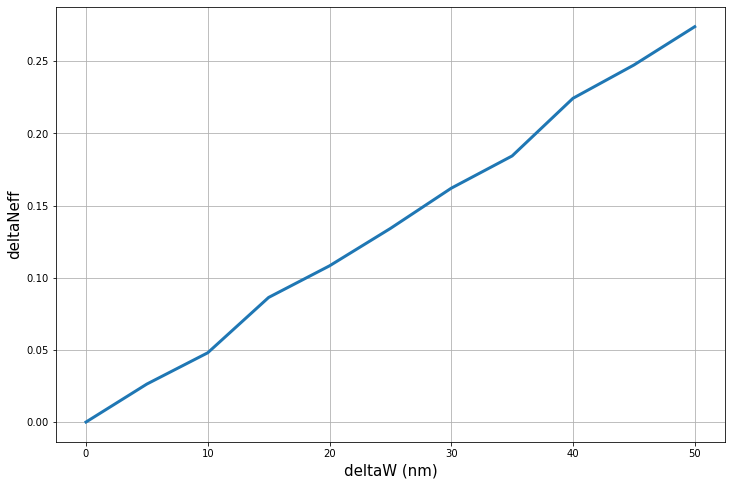

In [40]:
plt.figure(figsize = (12,8))
plt.plot(deltaLarg*1e9, deltaNeff, linewidth = 3)
# plt.ylim(-1, 0)
plt.xlabel('deltaW (nm)', fontsize = 15)
plt.ylabel('deltaNeff', fontsize = 15)
plt.grid(True)
plt.show()
# plt.savefig('Imagens/Loss x Box span')

In [41]:
nSimu = 6
deltaLarg = np.linspace(15e-9, 20e-9, nSimu)

# bragg.setnamed("structure group", "dLarg", deltaLarg[i])
deltaNeff = np.zeros(nSimu)
for i in range(nSimu):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "dLarg", deltaLarg[i])
    bragg.setnamed("FDE", "x", periodo/8)
    bragg.findmodes()
    deltaNeff[i] = np.real(bragg.getdata('FDE::data::mode1','neff'))
    
    bragg.switchtolayout()
    bragg.setnamed("FDE", "x", periodo/2)
    bragg.findmodes()
    deltaNeff[i] = deltaNeff[i] - np.real(bragg.getdata('FDE::data::mode1','neff'))
    print("Completed: " + str(i+1) + "/" + str(nSimu))


Completed: 1/6
Completed: 2/6
Completed: 3/6
Completed: 4/6
Completed: 5/6
Completed: 6/6


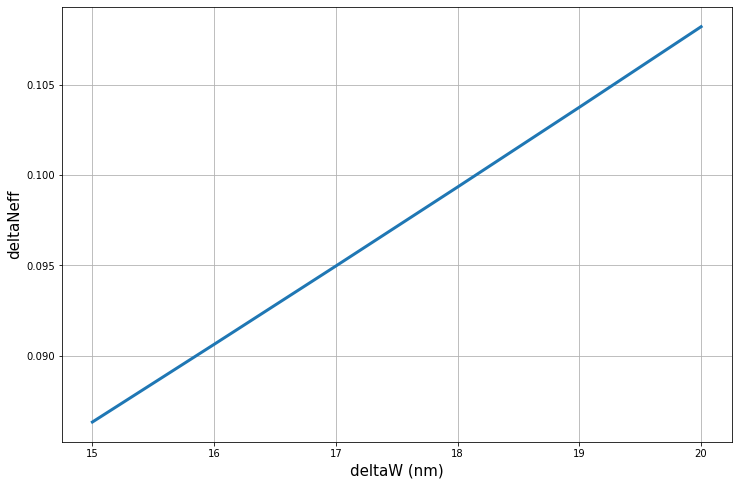

In [42]:
plt.figure(figsize = (12,8))
plt.plot(deltaLarg*1e9, deltaNeff, linewidth = 3)
# plt.ylim(-1, 0)
plt.xlabel('deltaW (nm)', fontsize = 15)
plt.ylabel('deltaNeff', fontsize = 15)
plt.grid(True)
plt.show()
# plt.savefig('Imagens/Loss x Box span')

In [43]:
nSimu = 11
deltaLarg = np.linspace(18e-9, 19e-9, nSimu)

# bragg.setnamed("structure group", "dLarg", deltaLarg[i])
deltaNeff = np.zeros(nSimu)
for i in range(nSimu):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "dLarg", deltaLarg[i])
    bragg.setnamed("FDE", "x", periodo/8)
    bragg.findmodes()
    deltaNeff[i] = np.real(bragg.getdata('FDE::data::mode1','neff'))
    
    bragg.switchtolayout()
    bragg.setnamed("FDE", "x", periodo/2)
    bragg.findmodes()
    deltaNeff[i] = deltaNeff[i] - np.real(bragg.getdata('FDE::data::mode1','neff'))
    print("Completed: " + str(i+1) + "/" + str(nSimu))


Completed: 1/11
Completed: 2/11
Completed: 3/11
Completed: 4/11
Completed: 5/11
Completed: 6/11
Completed: 7/11
Completed: 8/11
Completed: 9/11
Completed: 10/11
Completed: 11/11


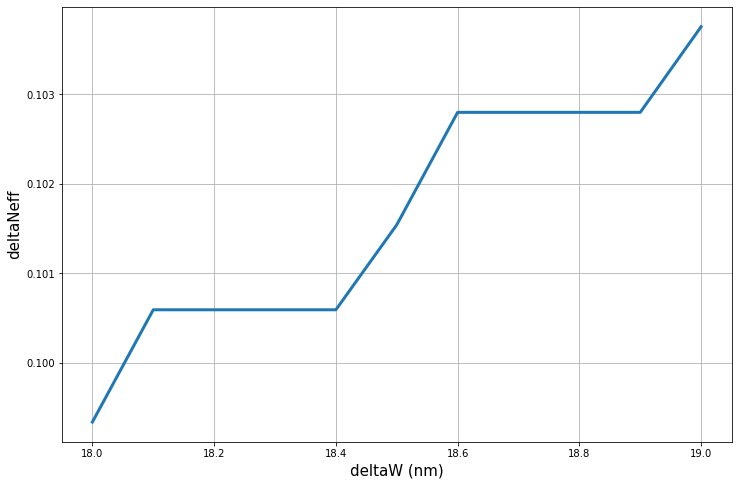

In [44]:
plt.figure(figsize = (12,8))
plt.plot(deltaLarg*1e9, deltaNeff, linewidth = 3)
# plt.ylim(-1, 0)
plt.xlabel('deltaW (nm)', fontsize = 15)
plt.ylabel('deltaNeff', fontsize = 15)
plt.grid(True)
plt.show()
# plt.savefig('Imagens/Loss x Box span')

In [9]:
Altura = 220e-9
Largura = 450e-9
periodo = 336.7e-9
dLarg = 18.4e-9
material = "Si (Silicon) - palik"
type2 = 1

In [ ]:

bragg.setnamed("EME", "number of periodic groups", 3)
bragg.setnamed("EME", "start cell group", np.transpose([1, 2, 5]))
bragg.setnamed("EME", "end cell group", np.transpose([1, 4, 5]))
bragg.setnamed("EME", "periods", np.transpose([1, 120, 1]))

315
461
1.5315e-06
1.5461e-06
Dlamb = 14.599999999999826 nm
lamb = 1538.8 nm


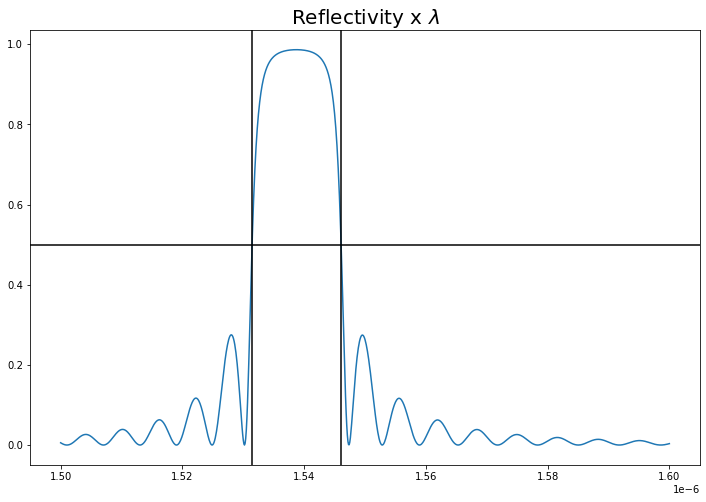

In [79]:
sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
plt.figure(figsize=(12, 8))
plt.plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2)
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)

for i in range(1001):
    if abs(sweepResultMatrix['s11'][i])**2 > 0.5:
        print(i)
        break
for i in range(315, 1001):
    if abs(sweepResultMatrix['s11'][i])**2 < 0.5:
        print(i)
        break

lambL = sweepResultMatrix['wavelength'][315][0]
lambH = sweepResultMatrix['wavelength'][461][0]
plt.axvline(x = lambL, color = 'black')
plt.axvline(x = lambH, color = 'black')

print('Dlamb = ' + str((lambH - lambL)*1e9) + " nm")
print('lamb = ' + str((lambH + lambL)*0.5e9) + " nm")

Text(0.5, 1.0, 'Reflectivity x $\\lambda$')

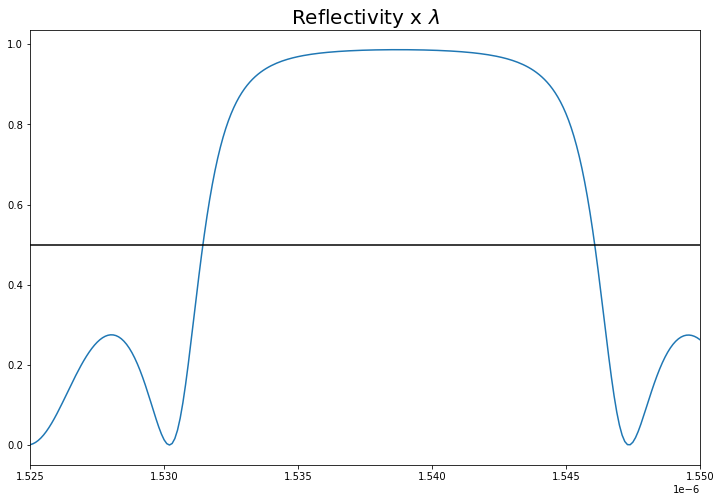

In [83]:

plt.figure(figsize=(12, 8))
plt.plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2)
plt.axhline(y = 1/2, color = 'black')
plt.xlim([1.525e-06, 1.55e-06])
# plt.xlim([1515e-9, 1545e-9])
plt.title(r"Reflectivity x $\lambda$",fontsize=20)

In [66]:
bragg = lumapi.MODE(filename='simulations_MODE.lms')

In [23]:
colors = ["red", "green", "blue", "magenta", "cyan", "yellow", "pink", "orange", "purple"]

completed: 1/9
completed: 2/9
completed: 3/9
completed: 4/9
completed: 5/9
completed: 6/9
completed: 7/9
completed: 8/9
completed: 9/9


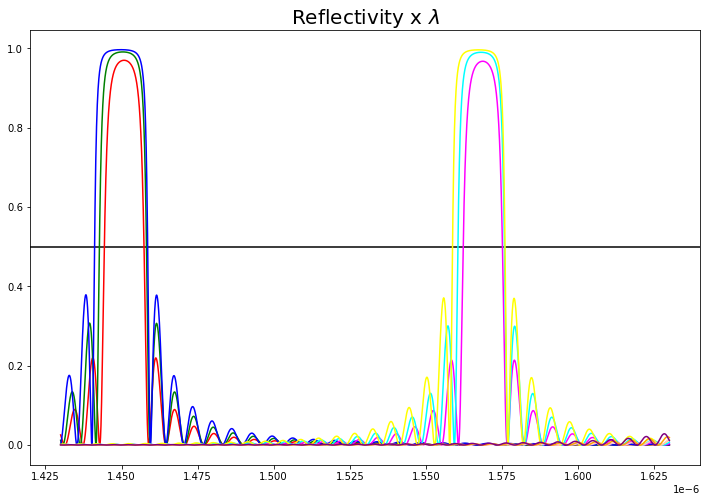

In [67]:
nSimu1 = 3
nSimu2 = 3
periodVar = np.linspace(3e-7, 4e-7, nSimu1)
dLargVar = np.linspace(1.5e-8, 2.5e-8, nSimu2)
resultsMatrix = np.zeros((3,3, 4001))
lambdaMatrix = np.zeros((3,3, 4001, 1))
lambdaVar = np.linspace(1.43e-6, 1.63e-6, 4001)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)




for i in range(nSimu1):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "periodo", periodVar[i])
    bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])

    for j in range(nSimu2):
        bragg.switchtolayout()
        bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.43e-6)
        bragg.setemeanalysis("stop wavelength",1.63e-6)
        bragg.setemeanalysis("number of wavelength points",4001)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        # # ax[2*i+(j/2)][j%2].plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2, label=("dLarg = "+str(dLargVar[j])))
        # # ax[2*i+(j/2)][j%2].plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2)
        # ax[2*i+(j/2)][j%2].plot(np.transpose(sweepResultMatrix['wavelength']),np.transpose(abs(sweepResultMatrix['s11'])**2))
        # ax[2*i+(j/2)][j%2].set_xlabel("wavelength", fontsize=18)
        # ax[2*i+(j/2)][j%2].set_ylabel( "period = " + str(periodVar[i] ) , fontsize=20)
        # ax[2*i+(j/2)][j%2].grid(True)
        # ax[2*i+(j/2)][j%2].legend(fontsize=14)

        # plt.plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2)
        plt.plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2, c = colors[3*i + j], label = "per = "+str(periodVar[i])+", dLarg = "+str(dLargVar[i]))
        print("completed: "+str(3*i+j+1)+"/"+str(nSimu1*nSimu2))


In [69]:
filterLims = np.zeros((3, 3, 2))
fwhmMatrix = np.zeros((3,3))
lambdaVar = np.linspace(1.43e-6, 1.63e-6, 4001)
graphMatrix = abs(resultsMatrix)**2

for i in range(3):
    for j in range(3):
        minX = 0
        maxX = 0
        cont = 0
        for k in range(4000):
            # if graphMatrix[i][j][k] < graphMatrix[i][j][k+1] and graphMatrix[i][j][k+1] >= 0.5:
            #     minX = k
            # if graphMatrix[i][j][k] > graphMatrix[i][j][k+1] and graphMatrix[i][j][k+1] <= 0.5:
            #     maxX = k+1
            #     if lambdaVar[maxX]-lambdaVar[minX] > fwhmMatrix[i][j]:
            #         filterLims[i][j][0] = minX
            #         filterLims[i][j][1] = maxX
            #         fwhmMatrix[i][j] = lambdaVar[maxX] - lambdaVar[minX]
            if graphMatrix[i][j][k+1] > 0.5:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if graphMatrix[i][j][k+1] < 0.5:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]
                    #oi oi 
                    # como voce esta?  tiltado com o delay da conexão
                    # fica uns 500 de ping pra digitar
                    # tu mexeu nas configuraçoes?
                    # por default vem para manter a qualidade maior
                    # mas tem a opçõe d diminuir o ping
                    # nao mexi, mas eu acho q o problema é com a internet msm
                    # vc sabe como mexe?
                    # na tela do anydesk ai, tem umas configuraçoes no canto superior direito
                    # ajeitei a config, mas nao parece ter mudado mta coisa
                    # afinal, acho q o problema é a internet msm
                    # Vou dxar aki e vou faxinar, xau

# print(int(filterLims[0][0][0]))
# print(lambdaVar)

# print("espaco")
# print(fwhmMatrix)


for i in range(3):
    for j in range(3):
        print("periodo "+str(periodVar[i])+" dLarg "+str(dLargVar[j]))
        print("lamb min = "+str(lambdaVar[int(filterLims[i][j][0])]*1e9)+" lamb max = "+str(lambdaVar[int(filterLims[i][j][1])]*1e9)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

periodo 3e-07 dLarg 1.5e-08
lamb min = 1444.95 lamb max = 1456.75 fwhm = 11.80000000000004
periodo 3e-07 dLarg 2e-08
lamb min = 1443.15 lamb max = 1457.7500000000002 fwhm = 14.600000000000039
periodo 3e-07 dLarg 2.5e-08
lamb min = 1441.5 lamb max = 1458.25 fwhm = 16.749999999999883
periodo 3.5e-07 dLarg 1.5e-08
lamb min = 1562.9 lamb max = 1574.5000000000002 fwhm = 11.600000000000025
periodo 3.5e-07 dLarg 2e-08
lamb min = 1560.95 lamb max = 1575.3500000000001 fwhm = 14.400000000000023
periodo 3.5e-07 dLarg 2.5e-08
lamb min = 1559.1000000000001 lamb max = 1575.65 fwhm = 16.55000000000008
periodo 4e-07 dLarg 1.5e-08
lamb min = 1430.0 lamb max = 1430.0 fwhm = 0.0
periodo 4e-07 dLarg 2e-08
lamb min = 1430.0 lamb max = 1430.0 fwhm = 0.0
periodo 4e-07 dLarg 2.5e-08
lamb min = 1430.0 lamb max = 1430.0 fwhm = 0.0


In [70]:
nSimu1 = 4
# nSimu2 = 3
periodVar = np.linspace(320e-9, 335e-9, nSimu1)
# dLargVar = np.linspace(1.5e-8, 2.5e-8, nSimu2)
resultsMatrix = np.zeros((4, 4001))
lambdaMatrix = np.zeros((4, 4001, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, 4001)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)




for i in range(nSimu1):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "periodo", periodVar[i])
    bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])

    bragg.run()
    bragg.emepropagate()

    bragg.setemeanalysis("wavelength sweep",1)
    bragg.setemeanalysis("start wavelength",1.48e-6)
    bragg.setemeanalysis("stop wavelength",1.58e-6)
    bragg.setemeanalysis("number of wavelength points",4001)
    bragg.emesweep("wavelength sweep")
    sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
    resultsMatrix[i] = abs(sweepResultMatrix['s11'])**2
    lambdaMatrix[i] = sweepResultMatrix['wavelength']



        # # ax[2*i+(j/2)][j%2].plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2, label=("dLarg = "+str(dLargVar[j])))
        # # ax[2*i+(j/2)][j%2].plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2)
        # ax[2*i+(j/2)][j%2].plot(np.transpose(sweepResultMatrix['wavelength']),np.transpose(abs(sweepResultMatrix['s11'])**2))
        # ax[2*i+(j/2)][j%2].set_xlabel("wavelength", fontsize=18)
        # ax[2*i+(j/2)][j%2].set_ylabel( "period = " + str(periodVar[i] ) , fontsize=20)
        # ax[2*i+(j/2)][j%2].grid(True)
        # ax[2*i+(j/2)][j%2].legend(fontsize=14)

        # plt.plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2)
        # plt.plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2, c = colors[3*i + j], label = "per = "+str(periodVar[i])+", dLarg = "+str(dLargVar[i]))
        # print("completed: "+str(3*i+j+1)+"/"+str(nSimu1*nSimu2))
    print("completed: "+str(i+1)+"/"+str(nSimu1))
    

completed: 1/4
completed: 2/4
completed: 3/4
completed: 4/4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


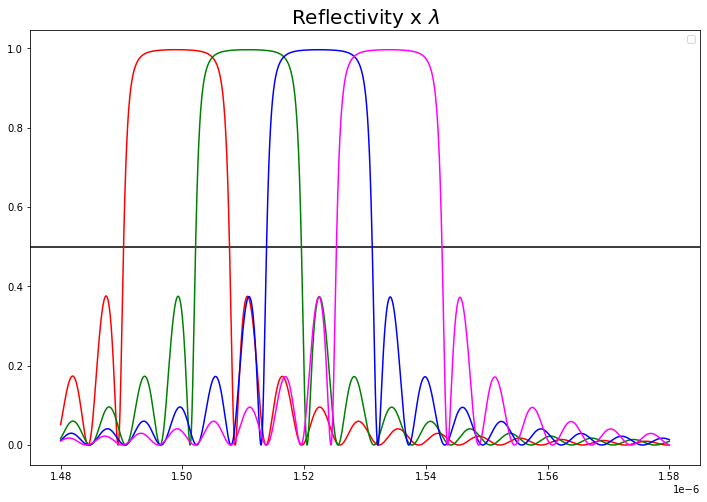

In [71]:

plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)
plt.legend()

for i in range(nSimu1):
    plt.plot(lambdaMatrix[i],resultsMatrix[i], c = colors[i], label = "per = "+str(periodVar[i]))


In [74]:
filterLims = np.zeros((4, 2))
fwhmMatrix = np.zeros(4)
lambdaVar = np.linspace(1.48e-6, 1.58e-6, 4001)
for i in range(nSimu1):
    minX = 0
    maxX = 0
    cont = 0
    for k in range(4000):
        if resultsMatrix[i][k+1] > 0.5:
            if cont == 0:
                filterLims[i][0] = k
                cont = 1
        if resultsMatrix[i][k+1] < 0.5:
            if cont == 1:
                filterLims[i][1] = k+1
                cont = 2
                fwhmMatrix[i] = lambdaVar[int(filterLims[i][1])] - lambdaVar[int(filterLims[i][0])]


for i in range(nSimu1):
    print("periodo "+str(periodVar[i]))
    print("lamb C = "+str((lambdaVar[int(filterLims[i][0])]*1e9 + lambdaVar[int(filterLims[i][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i]*1e9))

periodo 3.2e-07
lamb C = 1499.0375 fwhm = 17.425000000000093
periodo 3.25e-07
lamb C = 1510.8625000000002 fwhm = 17.42499999999988
periodo 3.3e-07
lamb C = 1522.5 fwhm = 17.400000000000038
periodo 3.35e-07
lamb C = 1533.975 fwhm = 17.349999999999927


In [75]:
nSimu1 = 13
nPontos = 8001
# nSimu2 = 3
periodVar = np.linspace(332e-9, 335e-9, nSimu1)
# dLargVar = np.linspace(1.5e-8, 2.5e-8, nSimu2)
resultsMatrix = np.zeros((nSimu1, nPontos))
lambdaMatrix = np.zeros((nSimu1, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)




for i in range(nSimu1):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "periodo", periodVar[i])
    bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])

    bragg.run()
    bragg.emepropagate()

    bragg.setemeanalysis("wavelength sweep",1)
    bragg.setemeanalysis("start wavelength",1.48e-6)
    bragg.setemeanalysis("stop wavelength",1.58e-6)
    bragg.setemeanalysis("number of wavelength points",nPontos)
    bragg.emesweep("wavelength sweep")
    sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
    resultsMatrix[i] = abs(sweepResultMatrix['s11'])**2
    lambdaMatrix[i] = sweepResultMatrix['wavelength']



        # # ax[2*i+(j/2)][j%2].plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2, label=("dLarg = "+str(dLargVar[j])))
        # # ax[2*i+(j/2)][j%2].plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2)
        # ax[2*i+(j/2)][j%2].plot(np.transpose(sweepResultMatrix['wavelength']),np.transpose(abs(sweepResultMatrix['s11'])**2))
        # ax[2*i+(j/2)][j%2].set_xlabel("wavelength", fontsize=18)
        # ax[2*i+(j/2)][j%2].set_ylabel( "period = " + str(periodVar[i] ) , fontsize=20)
        # ax[2*i+(j/2)][j%2].grid(True)
        # ax[2*i+(j/2)][j%2].legend(fontsize=14)

        # plt.plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2)
        # plt.plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2, c = colors[3*i + j], label = "per = "+str(periodVar[i])+", dLarg = "+str(dLargVar[i]))
        # print("completed: "+str(3*i+j+1)+"/"+str(nSimu1*nSimu2))
    print("completed: "+str(i+1)+"/"+str(nSimu1))
    

completed: 1/13
completed: 2/13
completed: 3/13
completed: 4/13
completed: 5/13
completed: 6/13
completed: 7/13
completed: 8/13
completed: 9/13
completed: 10/13
completed: 11/13
completed: 12/13
completed: 13/13


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


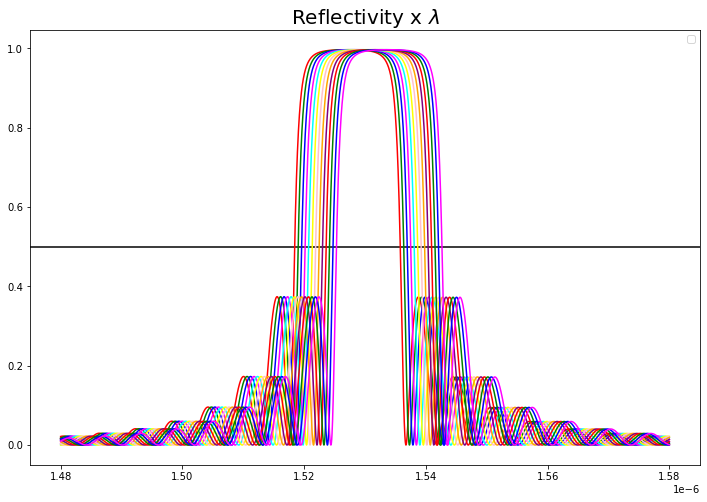

In [77]:

plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)
plt.legend()

for i in range(nSimu1):
    plt.plot(lambdaMatrix[i],resultsMatrix[i], c = colors[i%9], label = "per = "+str(periodVar[i]))


In [78]:
filterLims = np.zeros((nSimu1, 2))
fwhmMatrix = np.zeros(nSimu1)
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    minX = 0
    maxX = 0
    cont = 0
    for k in range(nPontos-1):
        if resultsMatrix[i][k+1] > 0.5:
            if cont == 0:
                filterLims[i][0] = k
                cont = 1
        if resultsMatrix[i][k+1] < 0.5:
            if cont == 1:
                filterLims[i][1] = k+1
                cont = 2
                fwhmMatrix[i] = lambdaVar[int(filterLims[i][1])] - lambdaVar[int(filterLims[i][0])]


for i in range(nSimu1):
    print("periodo "+str(periodVar[i]))
    print("lamb C = "+str((lambdaVar[int(filterLims[i][0])]*1e9 + lambdaVar[int(filterLims[i][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i]*1e9))

periodo 3.32e-07
lamb C = 1527.11875 fwhm = 17.362499999999955
periodo 3.3225000000000003e-07
lamb C = 1527.69375 fwhm = 17.362499999999955
periodo 3.325e-07
lamb C = 1528.2625 fwhm = 17.374999999999982
periodo 3.3275e-07
lamb C = 1528.8374999999999 fwhm = 17.374999999999982
periodo 3.3300000000000003e-07
lamb C = 1529.40625 fwhm = 17.362499999999955
periodo 3.3325e-07
lamb C = 1529.9812499999998 fwhm = 17.362499999999955
periodo 3.335e-07
lamb C = 1530.55625 fwhm = 17.362499999999955
periodo 3.3375000000000003e-07
lamb C = 1531.125 fwhm = 17.349999999999927
periodo 3.34e-07
lamb C = 1531.69375 fwhm = 17.362500000000168
periodo 3.3425e-07
lamb C = 1532.26875 fwhm = 17.362500000000168
periodo 3.3450000000000004e-07
lamb C = 1532.8375 fwhm = 17.35000000000014
periodo 3.3475e-07
lamb C = 1533.40625 fwhm = 17.362499999999955
periodo 3.35e-07
lamb C = 1533.975 fwhm = 17.349999999999927


In [79]:
periodo = 3.3325e-07
bragg.switchtolayout()
bragg.setnamed("structure group", "periodo", periodo)
bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodo/4, periodo/2, periodo/4, 3e-6)]))
bragg.setnamed("mesh", "x max", 1e-6 + periodo)

In [82]:
# nSimu1 = 13
nPontos = 8001
# nSimu2 = 3
NVar = range(65, 120, 5)
nSimu1 = 12
# periodVar = np.linspace(332e-9, 335e-9, nSimu1)
# dLargVar = np.linspace(1.5e-8, 2.5e-8, nSimu2)
resultsMatrix = np.zeros((nSimu1, nPontos))
lambdaMatrix = np.zeros((nSimu1, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)




for i in range(nSimu1):
    bragg.switchtolayout()
    bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))
    bragg.run()
    # bragg.setnamed("EME","override periodicity", True)
    bragg.emepropagate()

    bragg.setemeanalysis("wavelength sweep",1)
    bragg.setemeanalysis("start wavelength",1.48e-6)
    bragg.setemeanalysis("stop wavelength",1.58e-6)
    bragg.setemeanalysis("number of wavelength points",nPontos)
    bragg.emesweep("wavelength sweep")
    sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
    resultsMatrix[i] = abs(sweepResultMatrix['s11'])**2
    lambdaMatrix[i] = sweepResultMatrix['wavelength']



        # # ax[2*i+(j/2)][j%2].plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2, label=("dLarg = "+str(dLargVar[j])))
        # # ax[2*i+(j/2)][j%2].plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2)
        # ax[2*i+(j/2)][j%2].plot(np.transpose(sweepResultMatrix['wavelength']),np.transpose(abs(sweepResultMatrix['s11'])**2))
        # ax[2*i+(j/2)][j%2].set_xlabel("wavelength", fontsize=18)
        # ax[2*i+(j/2)][j%2].set_ylabel( "period = " + str(periodVar[i] ) , fontsize=20)
        # ax[2*i+(j/2)][j%2].grid(True)
        # ax[2*i+(j/2)][j%2].legend(fontsize=14)

        # plt.plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2)
        # plt.plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2, c = colors[3*i + j], label = "per = "+str(periodVar[i])+", dLarg = "+str(dLargVar[i]))
        # print("completed: "+str(3*i+j+1)+"/"+str(nSimu1*nSimu2))
    print("completed: "+str(i+1)+"/"+str(nSimu1))
    

completed: 1/12
completed: 2/12
completed: 3/12
completed: 4/12
completed: 5/12
completed: 6/12
completed: 7/12
completed: 8/12
completed: 9/12
completed: 10/12
completed: 11/12


IndexError: range object index out of range

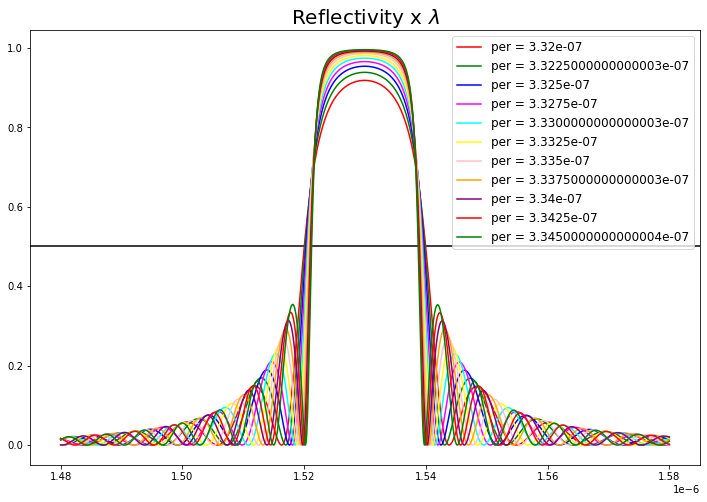

In [93]:
nSimu1 = 11

plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)

for i in range(nSimu1):
    plt.plot(lambdaMatrix[i],resultsMatrix[i], c = colors[i%9], label = "per = "+str(periodVar[i]))
plt.legend(fontsize = 12)


In [85]:
filterLims = np.zeros((nSimu1, 2))
fwhmMatrix = np.zeros(nSimu1)
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    minX = 0
    maxX = 0
    cont = 0
    for k in range(nPontos-1):
        if resultsMatrix[i][k+1] > 0.5:
            if cont == 0:
                filterLims[i][0] = k
                cont = 1
        if resultsMatrix[i][k+1] < 0.5:
            if cont == 1:
                filterLims[i][1] = k+1
                cont = 2
                fwhmMatrix[i] = lambdaVar[int(filterLims[i][1])] - lambdaVar[int(filterLims[i][0])]


for i in range(nSimu1):
    # print("periodo "+str(periodVar[i]))
    print("N "+str(NVar[i]))
    print("lamb C = "+str((lambdaVar[int(filterLims[i][0])]*1e9 + lambdaVar[int(filterLims[i][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i]*1e9))

N 65
lamb C = 1529.99375 fwhm = 19.96250000000015
N 70
lamb C = 1529.9937499999999 fwhm = 19.68749999999997
N 75
lamb C = 1529.99375 fwhm = 19.412499999999792
N 80
lamb C = 1529.9875 fwhm = 19.125000000000007
N 85
lamb C = 1529.9875 fwhm = 18.849999999999827
N 90
lamb C = 1529.9874999999997 fwhm = 18.600000000000126
N 95
lamb C = 1529.9875 fwhm = 18.35
N 100
lamb C = 1529.9875 fwhm = 18.124999999999932
N 105
lamb C = 1529.9812499999998 fwhm = 17.91249999999989
N 110
lamb C = 1529.9812499999998 fwhm = 17.712499999999874
N 115
lamb C = 1529.9812499999998 fwhm = 17.537499999999916


In [96]:
colors = [["darkred", "crimson", "orangered", "darkorange", "gold"], ["green", "limegreen", "mediumseagreen", "lime", "yellow"], ["darkblue", "mediumblue", "blue", "cyan", "skyblue"]]

In [97]:
# nSimu1 = 13
nPontos = 20001
NVar = [80, 90, 100]
nSimu1 = 3
nSimu2 = 5
dLargVar = np.linspace(25e-9, 35e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)



for i in range(nSimu1):
    bragg.switchtolayout()
    bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        bragg.switchtolayout()
        bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(5*i+j+1)+"/"+str(nSimu1*nSimu2))
    

completed: 1/15
completed: 2/15
completed: 3/15
completed: 4/15
completed: 5/15
completed: 6/15
completed: 7/15
completed: 8/15
completed: 9/15
completed: 10/15
completed: 11/15
completed: 12/15
completed: 13/15
completed: 14/15
completed: 15/15


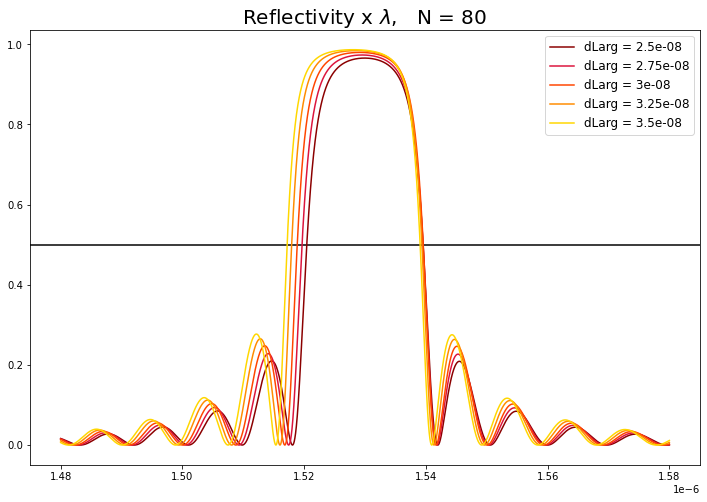

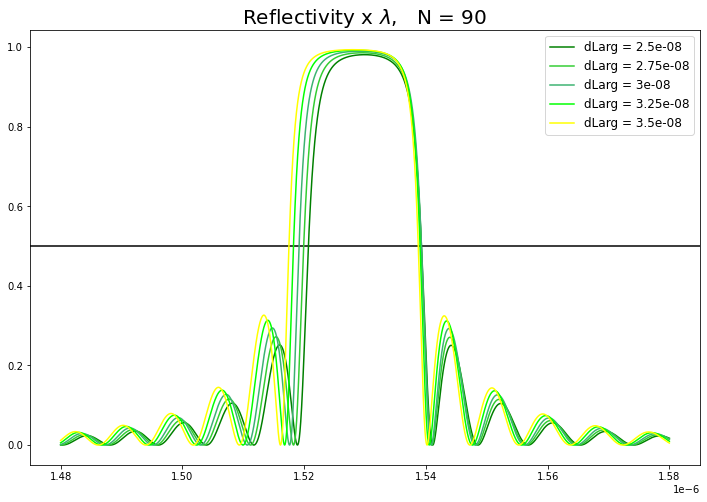

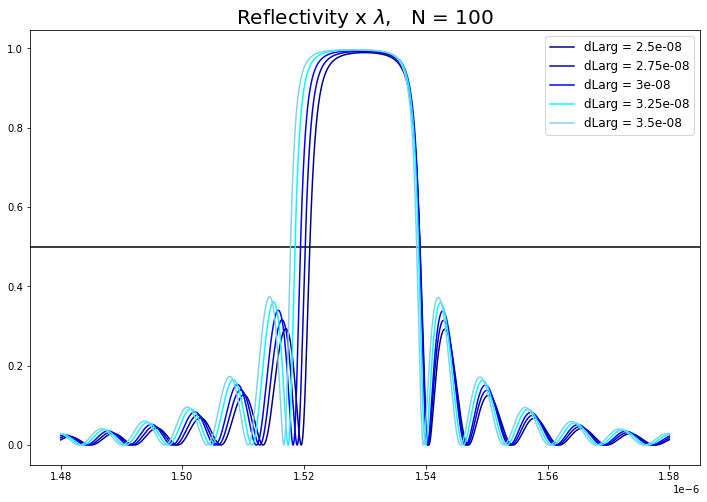

In [105]:
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$,   N = "+str(NVar[i]),fontsize=20)


for i in range(nSimu1):
    plt.figure(figsize=(12, 8))
    plt.axhline(y = 1/2, color = 'black')
    plt.title(r"Reflectivity x $\lambda$,   N = "+str(NVar[i]),fontsize=20)
    for j in range(nSimu2):
        plt.plot(lambdaMatrix[i][j],resultsMatrix[i][j], c = colors[i][j], label = "dLarg = "+str(round(dLargVar[j], 10)))
    plt.legend(fontsize = 12)


In [106]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > 0.5:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < 0.5:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i][j]))
        print("N "+str(NVar[i])+" / dLarg "+str(dLargVar[j]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

N 80 / dLarg 2.5e-08
lamb C = 1529.9924999999998 fwhm = 19.11499999999994
N 80 / dLarg 2.75e-08
lamb C = 1529.5924999999997 fwhm = 19.885000000000023
N 80 / dLarg 3.0000000000000004e-08
lamb C = 1529.2175 fwhm = 20.70499999999979
N 80 / dLarg 3.25e-08
lamb C = 1528.6525 fwhm = 21.40499999999984
N 80 / dLarg 3.5e-08
lamb C = 1528.1325 fwhm = 21.86499999999983
N 90 / dLarg 2.5e-08
lamb C = 1529.9875 fwhm = 18.584999999999926
N 90 / dLarg 2.75e-08
lamb C = 1529.5875 fwhm = 19.325000000000024
N 90 / dLarg 3.0000000000000004e-08
lamb C = 1529.215 fwhm = 20.119999999999944
N 90 / dLarg 3.25e-08
lamb C = 1528.6475 fwhm = 20.805000000000007
N 90 / dLarg 3.5e-08
lamb C = 1528.1275 fwhm = 21.255000000000145
N 100 / dLarg 2.5e-08
lamb C = 1529.9850000000001 fwhm = 18.120000000000005
N 100 / dLarg 2.75e-08
lamb C = 1529.585 fwhm = 18.839999999999975
N 100 / dLarg 3.0000000000000004e-08
lamb C = 1529.2125 fwhm = 19.625000000000046
N 100 / dLarg 3.25e-08
lamb C = 1528.645 fwhm = 20.289999999999978
N

In [107]:
# nSimu1 = 13
nPontos = 20001
N = 80
nSimu1 = 1
nSimu2 = 4
dLargVar = np.linspace(35e-9, 50e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

bragg.switchtolayout()
bragg.setnamed("EME","periods", np.transpose([1,N,1]))


for i in range(nSimu1):

    for j in range(nSimu2):
        bragg.switchtolayout()
        bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))
    

completed: 1/4
completed: 2/4
completed: 3/4
completed: 4/4


In [108]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > 0.5:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < 0.5:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i][j]))
        print("N "+str(NVar[i])+" / dLarg "+str(dLargVar[j]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

N 80 / dLarg 3.5e-08
lamb C = 1528.1325 fwhm = 21.86499999999983
N 80 / dLarg 4e-08
lamb C = 1527.005 fwhm = 22.769999999999825
N 80 / dLarg 4.5e-08
lamb C = 1525.635 fwhm = 23.349999999999955
N 80 / dLarg 5e-08
lamb C = 1524.2125 fwhm = 23.504999999999786


In [109]:
# nSimu1 = 13
nPontos = 20001
N = 80
nSimu1 = 1
nSimu2 = 11
dLargVar = np.linspace(50e-9, 100e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

bragg.switchtolayout()
bragg.setnamed("EME","periods", np.transpose([1,N,1]))


for i in range(nSimu1):

    for j in range(nSimu2):
        bragg.switchtolayout()
        bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))
    

completed: 1/11
completed: 2/11
completed: 3/11
completed: 4/11
completed: 5/11
completed: 6/11
completed: 7/11
completed: 8/11
completed: 9/11
completed: 10/11
completed: 11/11


In [110]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > 0.5:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < 0.5:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i][j]))
        print("N "+str(NVar[i])+" / dLarg "+str(dLargVar[j]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

N 80 / dLarg 5e-08
lamb C = 1524.2125 fwhm = 23.504999999999786
N 80 / dLarg 5.4999999999999996e-08
lamb C = 1522.4625 fwhm = 23.29499999999992
N 80 / dLarg 6e-08
lamb C = 1520.6750000000002 fwhm = 22.919999999999945
N 80 / dLarg 6.5e-08
lamb C = 1518.6325000000002 fwhm = 22.265000000000075
N 80 / dLarg 6.999999999999999e-08
lamb C = 1516.5349999999999 fwhm = 21.20000000000011
N 80 / dLarg 7.5e-08
lamb C = 1514.09 fwhm = 19.750000000000107
N 80 / dLarg 8e-08
lamb C = 1511.605 fwhm = 18.129999999999857
N 80 / dLarg 8.500000000000001e-08
lamb C = 1508.85 fwhm = 16.119999999999855
N 80 / dLarg 9e-08
lamb C = 1506.0275000000001 fwhm = 13.344999999999912
N 80 / dLarg 9.499999999999999e-08
lamb C = 1502.8175 fwhm = 8.794999999999888
N 80 / dLarg 1e-07
lamb C = 1480.0 fwhm = 0.0


In [112]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > 0.5:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < 0.5:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i][j]))
        print("N "+str(NVar[i])+" / dLarg "+str(dLargVar[j]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

N 80 / dLarg 4.5e-08
lamb C = 1480.0 fwhm = 0.0
N 80 / dLarg 4.6e-08
lamb C = 1480.0 fwhm = 0.0
N 80 / dLarg 4.7e-08
lamb C = 1480.0 fwhm = 0.0
N 80 / dLarg 4.8e-08
lamb C = 1480.0 fwhm = 0.0
N 80 / dLarg 4.9e-08
lamb C = 1480.0 fwhm = 0.0
N 80 / dLarg 5e-08
lamb C = 1480.0 fwhm = 0.0
N 80 / dLarg 5.1e-08
lamb C = 1480.0 fwhm = 0.0
N 80 / dLarg 5.2e-08
lamb C = 1480.0 fwhm = 0.0
N 80 / dLarg 5.3e-08
lamb C = 1480.0 fwhm = 0.0
N 80 / dLarg 5.4e-08
lamb C = 1480.0 fwhm = 0.0
N 80 / dLarg 5.5e-08
lamb C = 1480.0 fwhm = 0.0
N 90 / dLarg 4.5e-08
lamb C = 1481.38 fwhm = 2.759999999999953
N 90 / dLarg 4.6e-08
lamb C = 1481.29 fwhm = 2.5800000000000667
N 90 / dLarg 4.7e-08
lamb C = 1481.12 fwhm = 2.239999999999999
N 90 / dLarg 4.8e-08
lamb C = 1481.03 fwhm = 2.0599999999999006
N 90 / dLarg 4.9e-08
lamb C = 1480.9025000000001 fwhm = 1.8050000000000614
N 90 / dLarg 5e-08
lamb C = 1480.79 fwhm = 1.5799999999999916
N 90 / dLarg 5.1e-08
lamb C = 1480.5925000000002 fwhm = 1.1850000000000995
N 90 / d

IndexError: list index out of range

In [ ]:
# nSimu1 = 13
nPontos = 8001
# nSimu2 = 3
NVar = range(65, 120, 5)
nSimu1 = 12
# periodVar = np.linspace(332e-9, 335e-9, nSimu1)
# dLargVar = np.linspace(1.5e-8, 2.5e-8, nSimu2)
resultsMatrix = np.zeros((nSimu1, nPontos))
lambdaMatrix = np.zeros((nSimu1, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)




for i in range(nSimu1):
    bragg.switchtolayout()
    bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))
    bragg.run()
    # bragg.setnamed("EME","override periodicity", True)
    bragg.emepropagate()

    bragg.setemeanalysis("wavelength sweep",1)
    bragg.setemeanalysis("start wavelength",1.48e-6)
    bragg.setemeanalysis("stop wavelength",1.58e-6)
    bragg.setemeanalysis("number of wavelength points",nPontos)
    bragg.emesweep("wavelength sweep")
    sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
    resultsMatrix[i] = abs(sweepResultMatrix['s11'])**2
    lambdaMatrix[i] = sweepResultMatrix['wavelength']



        # # ax[2*i+(j/2)][j%2].plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2, label=("dLarg = "+str(dLargVar[j])))
        # # ax[2*i+(j/2)][j%2].plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2)
        # ax[2*i+(j/2)][j%2].plot(np.transpose(sweepResultMatrix['wavelength']),np.transpose(abs(sweepResultMatrix['s11'])**2))
        # ax[2*i+(j/2)][j%2].set_xlabel("wavelength", fontsize=18)
        # ax[2*i+(j/2)][j%2].set_ylabel( "period = " + str(periodVar[i] ) , fontsize=20)
        # ax[2*i+(j/2)][j%2].grid(True)
        # ax[2*i+(j/2)][j%2].legend(fontsize=14)

        # plt.plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2)
        # plt.plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2, c = colors[3*i + j], label = "per = "+str(periodVar[i])+", dLarg = "+str(dLargVar[i]))
        # print("completed: "+str(3*i+j+1)+"/"+str(nSimu1*nSimu2))
    print("completed: "+str(i+1)+"/"+str(nSimu1))
    

In [114]:
# nSimu1 = 13
nPontos = 5001
# N = 80
nSimu1 = 3
nSimu2 = 1
NVar = [60, 70, 80]
# NVar = range(65, 120, 5)
period = 3.3325e-07 #333.25 nm
dLarg = 50e-9
# periodVar = np.linspace(300e-9, 350e-9, nSimu1)
# dLargVar = np.linspace(45e-9, 55e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
bragg.setnamed("structure group", "periodo", period)
bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
bragg.setnamed("mesh", "x max", 1e-6 + period)
bragg.setnamed("structure group", "dLarg", dLarg)




for i in range(nSimu1):
    bragg.switchtolayout()
    # bragg.setnamed("structure group", "periodo", periodVar[i])
    # bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    # bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        # bragg.switchtolayout()
        # bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/3
completed: 2/3
completed: 3/3


In [118]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i][j]))
        print("periodo "+str(NVar[i])+" / dLarg "+str(dLargVar[j]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

periodo 60 / dLarg 4.5e-08
lamb C = 1524.23 fwhm = 25.380000000000084
periodo 70 / dLarg 4.5e-08
lamb C = 1524.21 fwhm = 24.339999999999964
periodo 80 / dLarg 4.5e-08
lamb C = 1524.21 fwhm = 23.539999999999907


In [119]:
# nSimu1 = 13
nPontos = 5001
# N = 80
nSimu1 = 11
nSimu2 = 1
# NVar = [60, 70, 80]
# NVar = range(65, 120, 5)
N = 70
period = 3.33e-07 #333 nm
dLarg = 50e-9
periodVar = np.linspace(328e-9, 338e-9, nSimu1)
# dLargVar = np.linspace(45e-9, 55e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
# bragg.setnamed("structure group", "periodo", period)
# bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
# bragg.setnamed("mesh", "x max", 1e-6 + period)

bragg.setnamed("structure group", "dLarg", dLarg)

bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "periodo", periodVar[i])
    bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    # bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        # bragg.switchtolayout()
        # bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/11
completed: 2/11
completed: 3/11
completed: 4/11
completed: 5/11
completed: 6/11
completed: 7/11
completed: 8/11
completed: 9/11
completed: 10/11
completed: 11/11


In [120]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i][j]))
        # print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j]))
        print("periodo "+str(periodVar[i]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

periodo 3.28e-07
lamb C = 1512.26 fwhm = 24.399999999999928
periodo 3.2900000000000005e-07
lamb C = 1514.55 fwhm = 24.38000000000001
periodo 3.3e-07
lamb C = 1516.84 fwhm = 24.360000000000095
periodo 3.31e-07
lamb C = 1519.12 fwhm = 24.360000000000095
periodo 3.32e-07
lamb C = 1521.3899999999999 fwhm = 24.339999999999964
periodo 3.3300000000000003e-07
lamb C = 1523.65 fwhm = 24.339999999999964
periodo 3.34e-07
lamb C = 1525.9099999999999 fwhm = 24.339999999999964
periodo 3.3499999999999997e-07
lamb C = 1528.1599999999999 fwhm = 24.32000000000005
periodo 3.36e-07
lamb C = 1530.4 fwhm = 24.32000000000005
periodo 3.37e-07
lamb C = 1532.6399999999999 fwhm = 24.32000000000005
periodo 3.38e-07
lamb C = 1534.87 fwhm = 24.29999999999992


In [123]:
# nSimu1 = 13
nPontos = 5001
# N = 80
nSimu1 = 11
nSimu2 = 1
# NVar = [60, 70, 80]
NVar = range(60, 70, 1)
period = 3.36e-07 #336 nm
dLarg = 50e-9
# periodVar = np.linspace(300e-9, 350e-9, nSimu1)
# dLargVar = np.linspace(45e-9, 55e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
bragg.setnamed("structure group", "periodo", period)
bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
bragg.setnamed("mesh", "x max", 1e-6 + period)
bragg.setnamed("structure group", "dLarg", dLarg)




for i in range(nSimu1):
    bragg.switchtolayout()
    # bragg.setnamed("structure group", "periodo", periodVar[i])
    # bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    # bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        # bragg.switchtolayout()
        # bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/11
completed: 2/11
completed: 3/11
completed: 4/11
completed: 5/11
completed: 6/11
completed: 7/11
completed: 8/11
completed: 9/11
completed: 10/11


IndexError: range object index out of range

In [124]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i][j]))
        # print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j]))
        print("N "+str(NVar[i]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

N 60
lamb C = 1530.4099999999999 fwhm = 25.34000000000004
N 61
lamb C = 1530.4099999999999 fwhm = 25.220000000000116
N 62
lamb C = 1530.4099999999999 fwhm = 25.140000000000025
N 63
lamb C = 1530.4099999999999 fwhm = 25.020000000000103
N 64
lamb C = 1530.41 fwhm = 24.899999999999967
N 65
lamb C = 1530.4099999999999 fwhm = 24.820000000000086
N 66
lamb C = 1530.41 fwhm = 24.69999999999995
N 67
lamb C = 1530.3999999999999 fwhm = 24.59999999999994
N 68
lamb C = 1530.4099999999999 fwhm = 24.500000000000146
N 69
lamb C = 1530.4099999999999 fwhm = 24.420000000000055


IndexError: range object index out of range

### Final results

In [254]:
N = 63
period = 3.36e-07 #336 nm
Largura = 450e-9
dLarg = 50e-9

In [ ]:
sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
plt.figure(figsize=(12, 8))
plt.plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2)
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)

for i in range(1001):
    if abs(sweepResultMatrix['s11'][i])**2 > 0.5:
        print(i)
        break
for i in range(315, 1001):
    if abs(sweepResultMatrix['s11'][i])**2 < 0.5:
        print(i)
        break

lambL = sweepResultMatrix['wavelength'][315][0]
lambH = sweepResultMatrix['wavelength'][461][0]
plt.axvline(x = lambL, color = 'black')
plt.axvline(x = lambH, color = 'black')

print('Dlamb = ' + str((lambH - lambL)*1e9) + " nm")
print('lamb = ' + str((lambH + lambL)*0.5e9) + " nm")

In [257]:
N = 63
period = 3.36e-07 #336 nm
Largura = 450e-9
dLarg = 50e-9

bragg.switchtolayout()
bragg.setnamed("structure group", "periodo", period)
bragg.setnamed("structure group", "Largura", Largura)
bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
bragg.setnamed("mesh", "x max", 1e-6 + period)
bragg.setnamed("structure group", "dLarg", dLarg)
bragg.setnamed("EME","periods", np.transpose([1,N,1]))


bragg.run()
bragg.emepropagate()

bragg.setemeanalysis("wavelength sweep",1)
bragg.setemeanalysis("start wavelength",1.48e-6)
bragg.setemeanalysis("stop wavelength",1.58e-6)
bragg.setemeanalysis("number of wavelength points",nPontos)
bragg.emesweep("wavelength sweep")

Text(0.5, 1.0, 'Reflectivity x $\\lambda$')

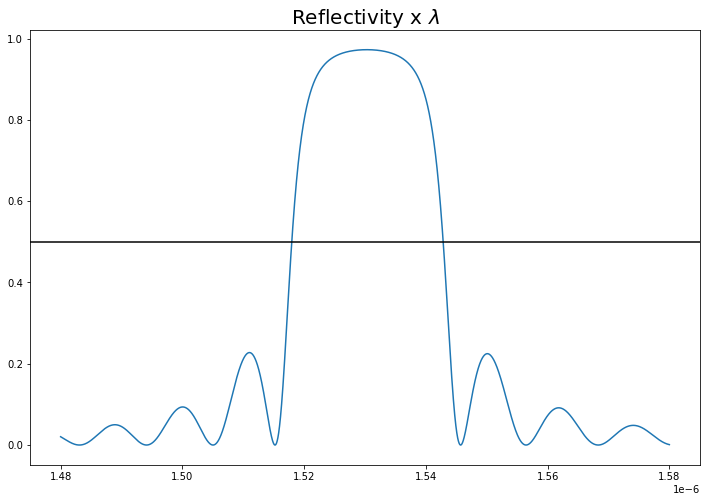

In [258]:
sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
plt.figure(figsize=(12, 8))
plt.plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2)
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)

# for i in range(1001):
#     if abs(sweepResultMatrix['s11'][i])**2 > 0.5:
#         print(i)
#         break
# for i in range(315, 1001):
#     if abs(sweepResultMatrix['s11'][i])**2 < 0.5:
#         print(i)
#         break

# lambL = sweepResultMatrix['wavelength'][315][0]
# lambH = sweepResultMatrix['wavelength'][461][0]
# plt.axvline(x = lambL, color = 'black')
# plt.axvline(x = lambH, color = 'black')

# print('Dlamb = ' + str((lambH - lambL)*1e9) + " nm")
# print('lamb = ' + str((lambH + lambL)*0.5e9) + " nm")

## retangular, width = 600 nm

### MODE simulations

In [ ]:
L = 1e-3
r_max = 0.8
lambda_ress = 1550e-9
neff = 1.447

c = 299792458
dlambda = np.linspace(lambda_ress - 2e-9, lambda_ress + 2e-9, 40000)

av_sigma = 0

In [ ]:
drc_delta = 2*np.pi*neff*((1/dlambda)-(1/lambda_ress))
sigma = av_sigma + drc_delta
# rmax = tanh²(kappa*L)
kappa = np.arctanh(np.sqrt(r_max))/L
# r = sinh²(srqt(kappa² - sigma²)*L)/(cosh²(srqt(kappa² - sigma²)*L) - (sigma²/kappa²))
refl = (np.sinh(csqrt(kappa**2 - sigma**2)*L)**2) / ((np.cosh(csqrt(kappa**2 - sigma**2)*L)**2) - ((sigma**2)/(kappa**2)))


dneff_ac = kappa*lambda_ress/np.pi
print('dneff ac = ' + str(dneff_ac))
dneff_dc = av_sigma*lambda_ress/(2*np.pi)
print('dneff dc = ' + str(dneff_dc))


plt.figure(figsize = (10, 6))
plt.plot(dlambda*1e9, refl)
plt.plot(dlambda*1e9, 1-refl)
# plt.axhline(y = 10*np.log10(1/2))
plt.xlim(1548,1552)
plt.xlabel('$\lambda$ (nm)',fontsize =15)
plt.ylabel('Reflectivity',fontsize =15)
plt.title(r'Linear transmission: All-pass ring, L = {} mm, r max = {}'.format(L*1e3,r_max),fontsize =18)
plt.legend(['Refletion','Transmission'])

In [125]:
# nSimu1 = 13
nPontos = 5001
N = 75
nSimu1 = 11
nSimu2 = 1
# NVar = [60, 70, 80]
# NVar = range(60, 70, 1)
# period = 3.36e-07 #336 nm
dLarg = 50e-9
periodVar = np.linspace(300e-9, 350e-9, nSimu1)
# dLargVar = np.linspace(45e-9, 55e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
# bragg.setnamed("structure group", "periodo", period)
# bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
# bragg.setnamed("mesh", "x max", 1e-6 + period)
bragg.setnamed("structure group", "dLarg", dLarg)
bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "periodo", periodVar[i])
    bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    # bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        # bragg.switchtolayout()
        # bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/11
completed: 2/11
completed: 3/11
completed: 4/11
completed: 5/11
completed: 6/11
completed: 7/11
completed: 8/11
completed: 9/11
completed: 10/11
completed: 11/11


In [127]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        print("periodo "+str(periodVar[i]))
        # print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j]))
        # print("N "+str(NVar[i]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

periodo 3e-07
lamb C = 1526.46 fwhm = 14.919999999999977
periodo 3.05e-07
lamb C = 1541.73 fwhm = 14.980000000000151
periodo 3.1e-07
lamb C = 1556.8 fwhm = 15.000000000000068
periodo 3.15e-07
lamb C = 1571.6799999999998 fwhm = 15.039999999999901
periodo 3.2e-07
lamb C = 1528.79 fwhm = 0.0
periodo 3.2499999999999996e-07
lamb C = 1570.4099999999999 fwhm = 2.980000000000097
periodo 3.3e-07
lamb C = 1560.8199999999997 fwhm = 3.240000000000074
periodo 3.3499999999999997e-07
lamb C = 1563.15 fwhm = 3.8999999999998693
periodo 3.4e-07
lamb C = 1554.11 fwhm = 2.0199999999998552
periodo 3.45e-07
lamb C = 1556.46 fwhm = 2.840000000000044
periodo 3.5e-07
lamb C = 1547.85 fwhm = 2.4199999999998854


In [128]:
# nSimu1 = 13
nPontos = 5001
N = 75
nSimu1 = 6
nSimu2 = 1
# NVar = [60, 70, 80]
# NVar = range(60, 70, 1)
# period = 3.36e-07 #336 nm
dLarg = 50e-9
periodVar = np.linspace(300e-9, 305e-9, nSimu1)
# dLargVar = np.linspace(45e-9, 55e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
# bragg.setnamed("structure group", "periodo", period)
# bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
# bragg.setnamed("mesh", "x max", 1e-6 + period)
bragg.setnamed("structure group", "dLarg", dLarg)
bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "periodo", periodVar[i])
    bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    # bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        # bragg.switchtolayout()
        # bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/6
completed: 2/6
completed: 3/6
completed: 4/6
completed: 5/6
completed: 6/6


In [129]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        print("periodo "+str(periodVar[i]))
        # print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j]))
        # print("N "+str(NVar[i]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

periodo 3e-07
lamb C = 1526.46 fwhm = 14.919999999999977
periodo 3.01e-07
lamb C = 1529.5299999999997 fwhm = 14.939999999999895
periodo 3.02e-07
lamb C = 1532.59 fwhm = 14.940000000000106
periodo 3.03e-07
lamb C = 1535.65 fwhm = 14.940000000000106
periodo 3.0399999999999997e-07
lamb C = 1538.7 fwhm = 14.960000000000022
periodo 3.05e-07
lamb C = 1541.73 fwhm = 14.980000000000151


In [133]:
print(np.linspace(45e-9, 120e-9, 16))

[4.50e-08 5.00e-08 5.50e-08 6.00e-08 6.50e-08 7.00e-08 7.50e-08 8.00e-08
 8.50e-08 9.00e-08 9.50e-08 1.00e-07 1.05e-07 1.10e-07 1.15e-07 1.20e-07]


In [134]:
# nSimu1 = 13
nPontos = 5001
N = 75
nSimu1 = 1
nSimu2 = 16
# NVar = [60, 70, 80]
# NVar = range(60, 70, 1)
period = 3.01e-07 #301 nm
# dLarg = 50e-9
# periodVar = np.linspace(300e-9, 305e-9, nSimu1)
dLargVar = np.linspace(45e-9, 120e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
bragg.setnamed("structure group", "periodo", period)
bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
bragg.setnamed("mesh", "x max", 1e-6 + period)
# bragg.setnamed("structure group", "dLarg", dLarg)
bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    # bragg.switchtolayout()
    # bragg.setnamed("structure group", "periodo", periodVar[i])
    # bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    # bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    # bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        bragg.switchtolayout()
        bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/16
completed: 2/16
completed: 3/16
completed: 4/16
completed: 5/16
completed: 6/16
completed: 7/16
completed: 8/16
completed: 9/16
completed: 10/16
completed: 11/16
completed: 12/16
completed: 13/16
completed: 14/16
completed: 15/16
completed: 16/16


In [136]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i]))
        print("dLarg "+str(dLargVar[j]))
        # print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j]))
        # print("N "+str(NVar[i]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

dLarg 4.5e-08
lamb C = 1529.9899999999998 fwhm = 14.81999999999997
dLarg 5e-08
lamb C = 1529.5299999999997 fwhm = 14.939999999999895
dLarg 5.5e-08
lamb C = 1528.99 fwhm = 14.940000000000106
dLarg 6.000000000000001e-08
lamb C = 1528.4499999999998 fwhm = 14.780000000000136
dLarg 6.5e-08
lamb C = 1527.77 fwhm = 14.50000000000003
dLarg 6.999999999999999e-08
lamb C = 1527.1100000000001 fwhm = 14.180000000000092
dLarg 7.5e-08
lamb C = 1526.35 fwhm = 13.780000000000062
dLarg 8e-08
lamb C = 1525.58 fwhm = 13.280000000000024
dLarg 8.500000000000001e-08
lamb C = 1524.6999999999998 fwhm = 12.720000000000024
dLarg 9e-08
lamb C = 1523.7999999999997 fwhm = 12.20000000000007
dLarg 9.499999999999999e-08
lamb C = 1522.8200000000002 fwhm = 11.680000000000115
dLarg 1e-07
lamb C = 1521.8199999999997 fwhm = 11.199999999999994
dLarg 1.05e-07
lamb C = 1520.7 fwhm = 10.84000000000001
dLarg 1.1e-07
lamb C = 1519.5700000000002 fwhm = 10.659999999999911
dLarg 1.1500000000000001e-07
lamb C = 1518.33 fwhm = 10.699

In [137]:
# nSimu1 = 13
nPontos = 5001
N = 75
nSimu1 = 1
nSimu2 = 21
# NVar = [60, 70, 80]
# NVar = range(60, 70, 1)
period = 3.01e-07 #301 nm
# dLarg = 50e-9
# periodVar = np.linspace(300e-9, 305e-9, nSimu1)
dLargVar = np.linspace(40e-9, 60e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
bragg.setnamed("structure group", "periodo", period)
bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
bragg.setnamed("mesh", "x max", 1e-6 + period)
# bragg.setnamed("structure group", "dLarg", dLarg)
bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    # bragg.switchtolayout()
    # bragg.setnamed("structure group", "periodo", periodVar[i])
    # bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    # bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    # bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        bragg.switchtolayout()
        bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/21
completed: 2/21
completed: 3/21
completed: 4/21
completed: 5/21
completed: 6/21
completed: 7/21
completed: 8/21
completed: 9/21
completed: 10/21
completed: 11/21
completed: 12/21
completed: 13/21
completed: 14/21
completed: 15/21
completed: 16/21
completed: 17/21
completed: 18/21
completed: 19/21
completed: 20/21
completed: 21/21


In [138]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i]))
        print("dLarg "+str(dLargVar[j]))
        # print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j]))
        # print("N "+str(NVar[i]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

dLarg 4e-08
lamb C = 1530.4499999999998 fwhm = 14.66
dLarg 4.1e-08
lamb C = 1530.3400000000001 fwhm = 14.679999999999916
dLarg 4.2e-08
lamb C = 1530.27 fwhm = 14.73999999999988
dLarg 4.3e-08
lamb C = 1530.17 fwhm = 14.81999999999997
dLarg 4.4e-08
lamb C = 1530.1100000000001 fwhm = 14.81999999999997
dLarg 4.5e-08
lamb C = 1529.9899999999998 fwhm = 14.81999999999997
dLarg 4.6e-08
lamb C = 1529.92 fwhm = 14.880000000000145
dLarg 4.7e-08
lamb C = 1529.81 fwhm = 14.939999999999895
dLarg 4.8e-08
lamb C = 1529.7399999999998 fwhm = 14.919999999999977
dLarg 4.8999999999999995e-08
lamb C = 1529.61 fwhm = 14.90000000000006
dLarg 5e-08
lamb C = 1529.5299999999997 fwhm = 14.939999999999895
dLarg 5.0999999999999993e-08
lamb C = 1529.42 fwhm = 14.960000000000022
dLarg 5.1999999999999996e-08
lamb C = 1529.34 fwhm = 14.960000000000022
dLarg 5.3e-08
lamb C = 1529.21 fwhm = 14.90000000000006
dLarg 5.3999999999999994e-08
lamb C = 1529.12 fwhm = 14.919999999999977
dLarg 5.4999999999999996e-08
lamb C = 1528

In [153]:

NVar = [40, 50, 60, 70, 80]
print(NVar)
# for i in range(20):
#     print(NVar[i])

[40, 50, 60, 70, 80]


In [154]:
# nSimu1 = 13
nPontos = 5001
# N = 75
nSimu1 = 5
nSimu2 = 1
# NVar = [60, 70, 80]
# NVar = range(40, 85, 10)
NVar = [40, 50, 60, 70, 80]
period = 3.01e-07 #301 nm
dLarg = 51e-9
# periodVar = np.linspace(300e-9, 305e-9, nSimu1)
# dLargVar = np.linspace(40e-9, 60e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
bragg.setnamed("structure group", "periodo", period)
bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
bragg.setnamed("mesh", "x max", 1e-6 + period)
bragg.setnamed("structure group", "dLarg", dLarg)
# bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    bragg.switchtolayout()
    # bragg.setnamed("structure group", "periodo", periodVar[i])
    # bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    # bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        # bragg.switchtolayout()
        # bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/5
completed: 2/5
completed: 3/5
completed: 4/5
completed: 5/5


In [155]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i]))
        print("N "+str(NVar[i]))
        # print("dLarg "+str(dLargVar[j]))
        # print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

N 40
lamb C = 1529.46 fwhm = 22.79999999999981
N 50
lamb C = 1529.44 fwhm = 19.240000000000006
N 60
lamb C = 1529.43 fwhm = 17.019999999999925
N 70
lamb C = 1529.42 fwhm = 15.520000000000023
N 80
lamb C = 1529.42 fwhm = 14.480000000000114


In [156]:
# nSimu1 = 13
nPontos = 5001
# N = 75
nSimu1 = 11
nSimu2 = 1
# NVar = [60, 70, 80]
# NVar = range(40, 85, 10)
NVar = np.zeros(nSimu1)
for i in range(nSimu1):
    NVar[i] = i + 30
period = 3.01e-07 #301 nm
dLarg = 51e-9
# periodVar = np.linspace(300e-9, 305e-9, nSimu1)
# dLargVar = np.linspace(40e-9, 60e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
bragg.setnamed("structure group", "periodo", period)
bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
bragg.setnamed("mesh", "x max", 1e-6 + period)
bragg.setnamed("structure group", "dLarg", dLarg)
# bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    bragg.switchtolayout()
    # bragg.setnamed("structure group", "periodo", periodVar[i])
    # bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    # bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        # bragg.switchtolayout()
        # bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/11
completed: 2/11
completed: 3/11
completed: 4/11
completed: 5/11
completed: 6/11
completed: 7/11
completed: 8/11
completed: 9/11
completed: 10/11
completed: 11/11


In [157]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i]))
        print("N "+str(NVar[i]))
        # print("dLarg "+str(dLargVar[j]))
        # print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

N 30.0
lamb C = 1529.51 fwhm = 29.060000000000024
N 31.0
lamb C = 1529.5 fwhm = 28.240000000000048
N 32.0
lamb C = 1529.49 fwhm = 27.460000000000115
N 33.0
lamb C = 1529.49 fwhm = 26.740000000000144
N 34.0
lamb C = 1529.48 fwhm = 26.079999999999927
N 35.0
lamb C = 1529.48 fwhm = 25.440000000000047
N 36.0
lamb C = 1529.47 fwhm = 24.86000000000013
N 37.0
lamb C = 1529.4699999999998 fwhm = 24.29999999999992
N 38.0
lamb C = 1529.46 fwhm = 23.760000000000048
N 39.0
lamb C = 1529.46 fwhm = 23.279999999999927
N 40.0
lamb C = 1529.46 fwhm = 22.79999999999981


In [166]:
# nSimu1 = 13
nPontos = 5001
N = 72
nSimu1 = 2
nSimu2 = 2
# NVar = [60, 70, 80]
# NVar = range(40, 85, 10)
# NVar = np.zeros(nSimu1)
# for i in range(nSimu1):
#     NVar[i] = i + 30
# period = 3.01e-07 #301 nm
# dLarg = 51e-9
periodVar = np.linspace(301e-9, 350e-9, nSimu1)
dLargVar = np.linspace(51e-9, 70e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
# bragg.setnamed("structure group", "periodo", period)
# bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
# bragg.setnamed("mesh", "x max", 1e-6 + period)
# bragg.setnamed("structure group", "dLarg", dLarg)
bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "periodo", periodVar[i])
    bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    # bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        bragg.switchtolayout()
        bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/4
completed: 2/4
completed: 3/4
completed: 4/4


In [167]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i]))
        # print("N "+str(NVar[i]))
        # print("dLarg "+str(dLargVar[j]))
        print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

periodo 3.01e-07 / dLarg 5.1e-08
lamb C = 1529.42 fwhm = 15.279999999999962
periodo 3.01e-07 / dLarg 7e-08
lamb C = 1527.1 fwhm = 14.52000000000016
periodo 3.5e-07 / dLarg 5.1e-08
lamb C = 1543.01 fwhm = 1.340000000000143
periodo 3.5e-07 / dLarg 7e-08
lamb C = 1540.6399999999999 fwhm = 1.359999999999848


In [183]:
colors = ["red", "green", "blue", "magenta", "yellow", "cyan", "orange", "brown", "purple"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


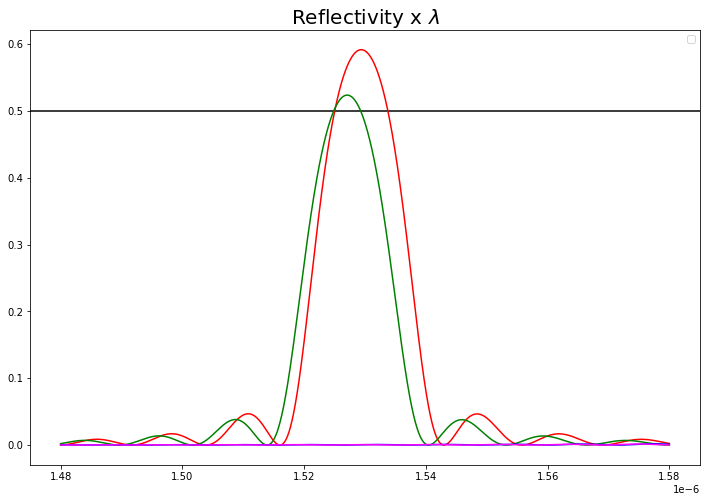

In [179]:

plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)
plt.legend()

for i in range(nSimu1):
    for j in range(nSimu2):
        # plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[i*2 + j], label = "per = "+str(periodVar[j])+", dLarg = "+str(lambdaVar[i]) )
        plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[i*2 + j])


In [180]:
# nSimu1 = 13
nPontos = 5001
# N = 72
nSimu1 = 8
nSimu2 = 1
# NVar = [60, 70, 80]
# NVar = range(40, 85, 10)
NVar = np.zeros(nSimu1)
for i in range(nSimu1):
    NVar[i] = 10*i + 30
period = 3.01e-07 #301 nm
dLarg = 51e-9
# periodVar = np.linspace(301e-9, 350e-9, nSimu1)
# dLargVar = np.linspace(51e-9, 70e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
bragg.setnamed("structure group", "periodo", period)
bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
bragg.setnamed("mesh", "x max", 1e-6 + period)
bragg.setnamed("structure group", "dLarg", dLarg)
# bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    bragg.switchtolayout()
    # bragg.setnamed("structure group", "periodo", periodVar[i])
    # bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    # bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        # bragg.switchtolayout()
        # bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/8
completed: 2/8
completed: 3/8
completed: 4/8
completed: 5/8
completed: 6/8
completed: 7/8
completed: 8/8


In [181]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i]))
        print("N "+str(NVar[i]))
        # print("dLarg "+str(dLargVar[j]))
        # print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

N 30.0
lamb C = 1529.51 fwhm = 29.060000000000024
N 40.0
lamb C = 1529.46 fwhm = 22.79999999999981
N 50.0
lamb C = 1529.44 fwhm = 19.240000000000006
N 60.0
lamb C = 1529.43 fwhm = 17.019999999999925
N 70.0
lamb C = 1529.42 fwhm = 15.520000000000023
N 80.0
lamb C = 1529.42 fwhm = 14.480000000000114
N 90.0
lamb C = 1529.41 fwhm = 13.739999999999805
N 100.0
lamb C = 1529.4099999999999 fwhm = 13.13999999999997


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


IndexError: list index out of range

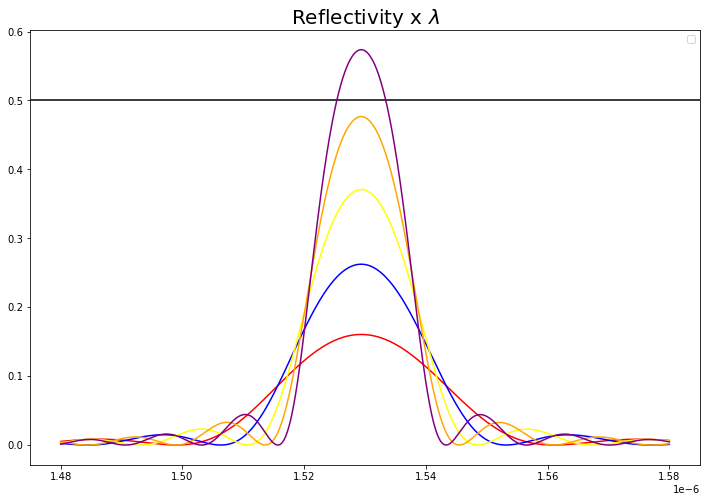

In [184]:

plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)
plt.legend()

for i in range(nSimu1):
    for j in range(nSimu2):
        # plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[i*2 + j], label = "per = "+str(periodVar[j])+", dLarg = "+str(lambdaVar[i]) )
        plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[i*2 + j])


In [193]:
# nSimu1 = 13
nPontos = 5001
# N = 72
nSimu1 = 4
nSimu2 = 3
# NVar = [60, 70, 80]
# NVar = range(40, 85, 10)
NVar = np.zeros(nSimu1)
for i in range(nSimu1):
    NVar[i] = 10*i + 40
period = 3.01e-07 #301 nm
# dLarg = 51e-9
# periodVar = np.linspace(301e-9, 350e-9, nSimu1)
dLargVar = np.linspace(40e-9, 60e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
bragg.setnamed("structure group", "periodo", period)
bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
bragg.setnamed("mesh", "x max", 1e-6 + period)
# bragg.setnamed("structure group", "dLarg", dLarg)
# bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    bragg.switchtolayout()
    # bragg.setnamed("structure group", "periodo", periodVar[i])
    # bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    # bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        bragg.switchtolayout()
        bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/12
completed: 2/12
completed: 3/12
completed: 4/12
completed: 5/12
completed: 6/12
completed: 7/12
completed: 8/12
completed: 9/12
completed: 10/12
completed: 11/12
completed: 12/12


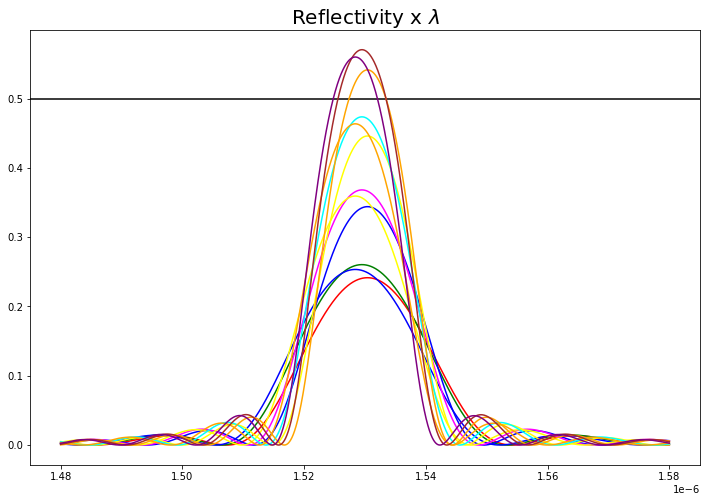

In [194]:

plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)
# plt.legend()

for i in range(nSimu1):
    for j in range(nSimu2):
        # plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[i*2 + j], label = "per = "+str(periodVar[j])+", dLarg = "+str(lambdaVar[i]) )
        plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[i*2 + j])


In [195]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i]))
        print("N "+str(NVar[i]))
        # print("dLarg "+str(dLargVar[j]))
        # print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

N 40.0
lamb C = 1530.49 fwhm = 22.61999999999992
N 40.0
lamb C = 1529.57 fwhm = 22.77999999999989
N 40.0
lamb C = 1528.48 fwhm = 22.64000000000005
N 50.0
lamb C = 1530.4699999999998 fwhm = 19.020000000000074
N 50.0
lamb C = 1529.55 fwhm = 19.220000000000088
N 50.0
lamb C = 1528.46 fwhm = 19.080000000000037
N 60.0
lamb C = 1530.46 fwhm = 16.760000000000158
N 60.0
lamb C = 1529.54 fwhm = 17.000000000000007
N 60.0
lamb C = 1528.4499999999998 fwhm = 16.859999999999953
N 70.0
lamb C = 1530.4499999999998 fwhm = 15.22
N 70.0
lamb C = 1529.53 fwhm = 15.499999999999893
N 70.0
lamb C = 1528.44 fwhm = 15.359999999999841


In [196]:
# nSimu1 = 13
nPontos = 5001
N = 80
nSimu1 = 1
nSimu2 = 29
# NVar = [60, 70, 80]
# NVar = range(40, 85, 10)
# NVar = np.zeros(nSimu1)
# for i in range(nSimu1):
#     NVar[i] = 10*i + 40
period = 3.01e-07 #301 nm
# dLarg = 51e-9
# periodVar = np.linspace(301e-9, 350e-9, nSimu1)
dLargVar = np.linspace(15e-9, 155e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
bragg.setnamed("structure group", "periodo", period)
bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
bragg.setnamed("mesh", "x max", 1e-6 + period)
# bragg.setnamed("structure group", "dLarg", dLarg)
bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    # bragg.switchtolayout()
    # bragg.setnamed("structure group", "periodo", periodVar[i])
    # bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    # bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    # bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        bragg.switchtolayout()
        bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/29
completed: 2/29
completed: 3/29
completed: 4/29
completed: 5/29
completed: 6/29
completed: 7/29
completed: 8/29
completed: 9/29
completed: 10/29
completed: 11/29
completed: 12/29
completed: 13/29
completed: 14/29
completed: 15/29
completed: 16/29
completed: 17/29
completed: 18/29
completed: 19/29
completed: 20/29
completed: 21/29
completed: 22/29
completed: 23/29
completed: 24/29
completed: 25/29
completed: 26/29
completed: 27/29
completed: 28/29
completed: 29/29


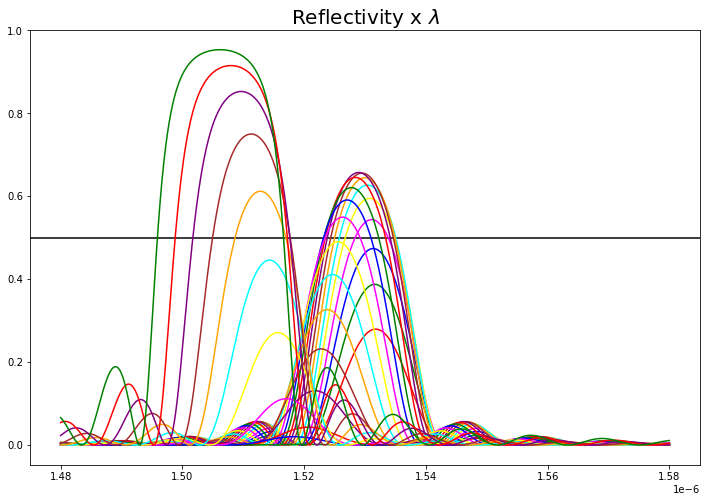

In [198]:

plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)
# plt.legend()

for i in range(nSimu1):
    for j in range(nSimu2):
        # plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[i*2 + j], label = "per = "+str(periodVar[j])+", dLarg = "+str(lambdaVar[i]) )
        plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[(i*2 + j)%9])


In [199]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i]))
        # print("N "+str(NVar[i]))
        print("dLarg "+str(dLargVar[j]))
        # print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

dLarg 1.5e-08
lamb C = 1531.76 fwhm = 11.55999999999998
dLarg 2e-08
lamb C = 1531.62 fwhm = 12.20000000000007
dLarg 2.5e-08
lamb C = 1531.3799999999999 fwhm = 12.800000000000114
dLarg 3.0000000000000004e-08
lamb C = 1531.12 fwhm = 13.359999999999902
dLarg 3.4999999999999996e-08
lamb C = 1530.7799999999997 fwhm = 13.840000000000023
dLarg 4e-08
lamb C = 1530.44 fwhm = 14.159999999999963
dLarg 4.5000000000000006e-08
lamb C = 1529.99 fwhm = 14.34000000000006
dLarg 5e-08
lamb C = 1529.53 fwhm = 14.459999999999985
dLarg 5.5e-08
lamb C = 1528.99 fwhm = 14.459999999999985
dLarg 6e-08
lamb C = 1528.4499999999998 fwhm = 14.300000000000015
dLarg 6.5e-08
lamb C = 1527.77 fwhm = 14.019999999999909
dLarg 7e-08
lamb C = 1527.1 fwhm = 13.679999999999842
dLarg 7.500000000000001e-08
lamb C = 1526.3400000000001 fwhm = 13.280000000000024
dLarg 8e-08
lamb C = 1525.58 fwhm = 12.760000000000069
dLarg 8.500000000000001e-08
lamb C = 1524.69 fwhm = 12.140000000000107
dLarg 9e-08
lamb C = 1523.8 fwhm = 11.600000

In [205]:
# nSimu1 = 13
nPontos = 5001
N = 80
nSimu1 = 1
nSimu2 = 6
# NVar = [60, 70, 80]
# NVar = range(40, 85, 10)
# NVar = np.zeros(nSimu1)
# for i in range(nSimu1):
#     NVar[i] = 10*i + 40
period = 3.01e-07 #301 nm
# dLarg = 51e-9
# periodVar = np.linspace(301e-9, 350e-9, nSimu1)
dLargVar = np.linspace(150e-9, 200e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
bragg.setnamed("structure group", "periodo", period)
bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
bragg.setnamed("mesh", "x max", 1e-6 + period)
# bragg.setnamed("structure group", "dLarg", dLarg)
bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    # bragg.switchtolayout()
    # bragg.setnamed("structure group", "periodo", periodVar[i])
    # bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    # bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    # bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        bragg.switchtolayout()
        bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/6
completed: 2/6
completed: 3/6
completed: 4/6
completed: 5/6
completed: 6/6


In [207]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i])+"\t\t ref_max = "+str(maxR))
        # print("N "+str(NVar[i])+"\t\t ref_max = "+str(maxR))
        print("dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        # print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

dLarg 1.5e-07		 ref_max = 0.9999696275867558
lamb C = 1508.03 fwhm = 18.93999999999977
dLarg 1.6e-07		 ref_max = 0.9999696275867558
lamb C = 1504.47 fwhm = 23.09999999999983
dLarg 1.7e-07		 ref_max = 0.9999696275867558
lamb C = 1500.54 fwhm = 27.55999999999991
dLarg 1.8e-07		 ref_max = 0.9999696275867558
lamb C = 1496.33 fwhm = 32.220000000000006
dLarg 1.8999999999999998e-07		 ref_max = 0.9999696275867558
lamb C = 1495.1999999999998 fwhm = 30.399999999999956
dLarg 2e-07		 ref_max = 0.9999696275867558
lamb C = 1494.1100000000001 fwhm = 28.219999999999917


['red', 'green', 'blue', 'magenta', 'yellow', 'cyan', 'orange', 'brown', 'purple']


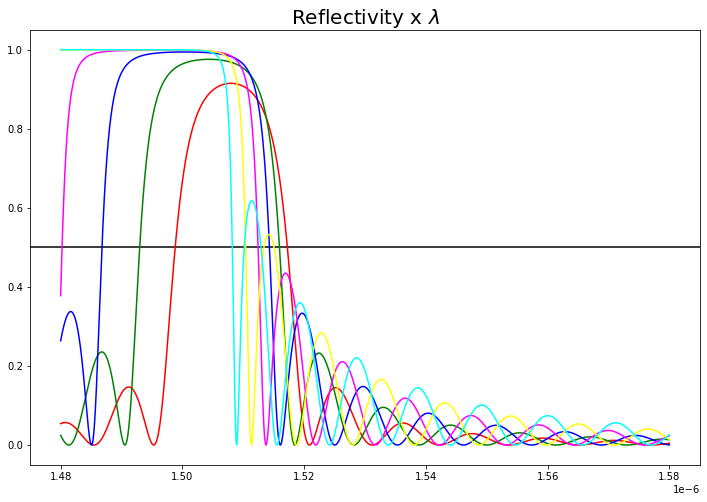

In [209]:

plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)
# plt.legend()

for i in range(nSimu1):
    for j in range(nSimu2):
        # plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[i*2 + j], label = "per = "+str(periodVar[j])+", dLarg = "+str(lambdaVar[i]) )
        plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[(i*2 + j)%9])

print(colors)

In [211]:
# nSimu1 = 13
nPontos = 10001
N = 80
nSimu1 = 2
nSimu2 = 8
# NVar = [60, 70, 80]
# NVar = range(40, 85, 10)
# NVar = np.zeros(nSimu1)
# for i in range(nSimu1):
#     NVar[i] = 10*i + 40
# period = 3.01e-07 #301 nm
# dLarg = 51e-9
periodVar = np.linspace(301e-9, 350e-9, nSimu1)
dLargVar = np.linspace(180e-9, 250e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.43e-6, 1.63e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
# bragg.setnamed("structure group", "periodo", period)
# bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
# bragg.setnamed("mesh", "x max", 1e-6 + period)
# bragg.setnamed("structure group", "dLarg", dLarg)
bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "periodo", periodVar[i])
    bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    # bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        bragg.switchtolayout()
        bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.43e-6)
        bragg.setemeanalysis("stop wavelength",1.63e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/16
completed: 2/16
completed: 3/16
completed: 4/16
completed: 5/16
completed: 6/16
completed: 7/16
completed: 8/16
completed: 9/16
completed: 10/16
completed: 11/16
completed: 12/16
completed: 13/16
completed: 14/16
completed: 15/16
completed: 16/16


In [214]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i])+"\t\t ref_max = "+str(maxR))
        # print("N "+str(NVar[i])+"\t\t ref_max = "+str(maxR))
        # print("dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))
        print()


periodo 3.01e-07 / dLarg 1.8e-07		 ref_max = 0.9999992263762922
lamb C = 1513.165 fwhm = 16.110000000000003

periodo 3.01e-07 / dLarg 1.9e-07		 ref_max = 0.9999992263762922
lamb C = 1499.715 fwhm = 0.8699999999998748

periodo 3.01e-07 / dLarg 2e-07		 ref_max = 0.9999992263762922
lamb C = 1496.12 fwhm = 1.3399999999999312

periodo 3.01e-07 / dLarg 2.1e-07		 ref_max = 0.9999992263762922
lamb C = 1492.1200000000001 fwhm = 1.4799999999999842

periodo 3.01e-07 / dLarg 2.1999999999999998e-07		 ref_max = 0.9999992263762922
lamb C = 1484.9450000000002 fwhm = 0.7099999999999052

periodo 3.01e-07 / dLarg 2.3e-07		 ref_max = 0.9999992263762922
lamb C = 1480.545 fwhm = 1.0900000000000183

periodo 3.01e-07 / dLarg 2.4e-07		 ref_max = 0.9999992263762922
lamb C = 1496.8899999999999 fwhm = 33.77999999999987

periodo 3.01e-07 / dLarg 2.5e-07		 ref_max = 0.9999992263762922
lamb C = 1496.075 fwhm = 32.14999999999998

periodo 3.5e-07 / dLarg 1.8e-07		 ref_max = 0.9999992263762922
lamb C = 1524.90999999999

['red', 'green', 'blue', 'magenta', 'yellow', 'cyan', 'orange', 'brown', 'purple']


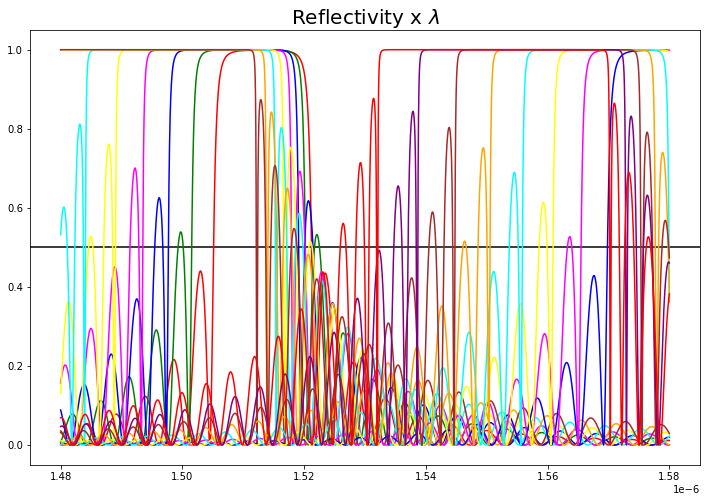

In [213]:

plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)
# plt.legend()

for i in range(nSimu1):
    for j in range(nSimu2):
        # plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[i*2 + j], label = "per = "+str(periodVar[j])+", dLarg = "+str(lambdaVar[i]) )
        plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[(i*2 + j)%9])

print(colors)

In [215]:
# nSimu1 = 13
nPontos = 10001
N = 80
nSimu1 = 7
nSimu2 = 5
# NVar = [60, 70, 80]
# NVar = range(40, 85, 10)
# NVar = np.zeros(nSimu1)
# for i in range(nSimu1):
#     NVar[i] = 10*i + 40
# period = 3.01e-07 #301 nm
# dLarg = 51e-9
periodVar = np.linspace(315e-9, 345e-9, nSimu1)
dLargVar = np.linspace(180e-9, 220e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.43e-6, 1.63e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
# bragg.setnamed("structure group", "periodo", period)
# bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
# bragg.setnamed("mesh", "x max", 1e-6 + period)
# bragg.setnamed("structure group", "dLarg", dLarg)
bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "periodo", periodVar[i])
    bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    # bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        bragg.switchtolayout()
        bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.43e-6)
        bragg.setemeanalysis("stop wavelength",1.63e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/35
completed: 2/35
completed: 3/35
completed: 4/35
completed: 5/35
completed: 6/35
completed: 7/35
completed: 8/35
completed: 9/35
completed: 10/35
completed: 11/35
completed: 12/35
completed: 13/35
completed: 14/35
completed: 15/35
completed: 16/35
completed: 17/35
completed: 18/35
completed: 19/35
completed: 20/35
completed: 21/35
completed: 22/35
completed: 23/35
completed: 24/35
completed: 25/35
completed: 26/35
completed: 27/35
completed: 28/35
completed: 29/35
completed: 30/35
completed: 31/35
completed: 32/35
completed: 33/35
completed: 34/35
completed: 35/35


In [216]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.43e-6, 1.63e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i])+"\t\t ref_max = "+str(maxR))
        # print("N "+str(NVar[i])+"\t\t ref_max = "+str(maxR))
        # print("dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))
        print()


periodo 3.15e-07 / dLarg 1.8e-07		 ref_max = 0.9999986133932232
lamb C = 1535.1 fwhm = 32.239999999999924

periodo 3.15e-07 / dLarg 1.9e-07		 ref_max = 0.9999986133932232
lamb C = 1507.72 fwhm = 1.6799999999999993

periodo 3.15e-07 / dLarg 2e-07		 ref_max = 0.9999986133932232
lamb C = 1500.08 fwhm = 2.6800000000000743

periodo 3.15e-07 / dLarg 2.1e-07		 ref_max = 0.9999986133932232
lamb C = 1491.6100000000001 fwhm = 2.980000000000097

periodo 3.15e-07 / dLarg 2.2e-07		 ref_max = 0.9999986133932232
lamb C = 1476.7400000000002 fwhm = 1.3600000000000598

periodo 3.2e-07 / dLarg 1.8e-07		 ref_max = 0.9999986133932232
lamb C = 1548.5900000000001 fwhm = 32.220000000000006

periodo 3.2e-07 / dLarg 1.9e-07		 ref_max = 0.9999986133932232
lamb C = 1521.04 fwhm = 1.6400000000001655

periodo 3.2e-07 / dLarg 2e-07		 ref_max = 0.9999986133932232
lamb C = 1513.2400000000002 fwhm = 2.6800000000000743

periodo 3.2e-07 / dLarg 2.1e-07		 ref_max = 0.9999986133932232
lamb C = 1504.6 fwhm = 2.9600000000001

['red', 'green', 'blue', 'magenta', 'yellow', 'cyan', 'orange', 'brown', 'purple']


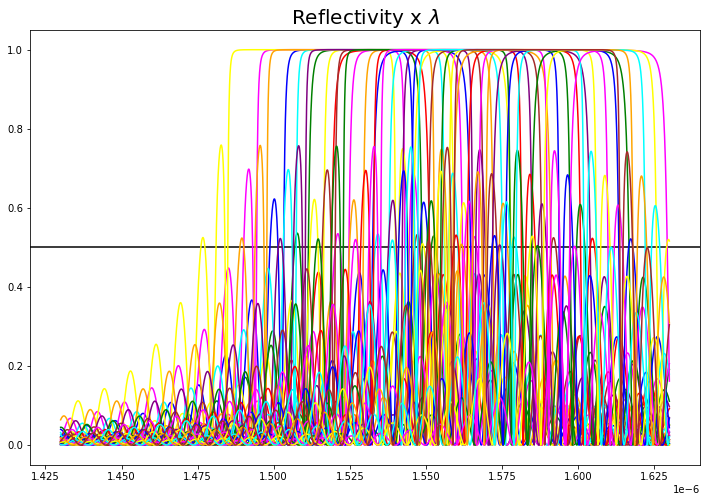

In [217]:

plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)
# plt.legend()

for i in range(nSimu1):
    for j in range(nSimu2):
        # plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[i*2 + j], label = "per = "+str(periodVar[j])+", dLarg = "+str(lambdaVar[i]) )
        plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[(i*2 + j)%9])

print(colors)

In [220]:
# nSimu1 = 13
nPontos = 10001
N = 80
nSimu1 = 6
nSimu2 = 4
# NVar = [60, 70, 80]
# NVar = range(40, 85, 10)
# NVar = np.zeros(nSimu1)
# for i in range(nSimu1):
#     NVar[i] = 10*i + 40
# period = 3.01e-07 #301 nm
# dLarg = 51e-9
periodVar = np.linspace(310e-9, 315e-9, nSimu1)
dLargVar = np.linspace(150e-9, 180e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.43e-6, 1.63e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
# bragg.setnamed("structure group", "periodo", period)
# bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
# bragg.setnamed("mesh", "x max", 1e-6 + period)
# bragg.setnamed("structure group", "dLarg", dLarg)
bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "periodo", periodVar[i])
    bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    # bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        bragg.switchtolayout()
        bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.43e-6)
        bragg.setemeanalysis("stop wavelength",1.63e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/24
completed: 2/24
completed: 3/24
completed: 4/24
completed: 5/24
completed: 6/24
completed: 7/24
completed: 8/24
completed: 9/24
completed: 10/24
completed: 11/24
completed: 12/24
completed: 13/24
completed: 14/24
completed: 15/24
completed: 16/24
completed: 17/24
completed: 18/24
completed: 19/24
completed: 20/24
completed: 21/24
completed: 22/24
completed: 23/24
completed: 24/24


In [221]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.43e-6, 1.63e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i])+"\t\t ref_max = "+str(maxR))
        # print("N "+str(NVar[i])+"\t\t ref_max = "+str(maxR))
        # print("dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))
        print()


periodo 3.1e-07 / dLarg 1.5e-07		 ref_max = 0.9987401611400696
lamb C = 1533.8899999999999 fwhm = 18.979999999999816

periodo 3.1e-07 / dLarg 1.6e-07		 ref_max = 0.9987401611400696
lamb C = 1530.1 fwhm = 23.12000000000017

periodo 3.1e-07 / dLarg 1.7e-07		 ref_max = 0.9987401611400696
lamb C = 1525.91 fwhm = 27.58000000000004

periodo 3.1e-07 / dLarg 1.8e-07		 ref_max = 0.9987401611400696
lamb C = 1521.44 fwhm = 32.239999999999924

periodo 3.11e-07 / dLarg 1.5e-07		 ref_max = 0.9987401611400696
lamb C = 1536.73 fwhm = 18.98000000000003

periodo 3.11e-07 / dLarg 1.6e-07		 ref_max = 0.9987401611400696
lamb C = 1532.9 fwhm = 23.12000000000017

periodo 3.11e-07 / dLarg 1.7e-07		 ref_max = 0.9987401611400696
lamb C = 1528.69 fwhm = 27.58000000000004

periodo 3.11e-07 / dLarg 1.8e-07		 ref_max = 0.9987401611400696
lamb C = 1524.1800000000003 fwhm = 32.239999999999924

periodo 3.12e-07 / dLarg 1.5e-07		 ref_max = 0.9987401611400696
lamb C = 1539.5500000000002 fwhm = 18.98000000000003

periodo

['red', 'green', 'blue', 'magenta', 'yellow', 'cyan', 'orange', 'brown', 'purple']


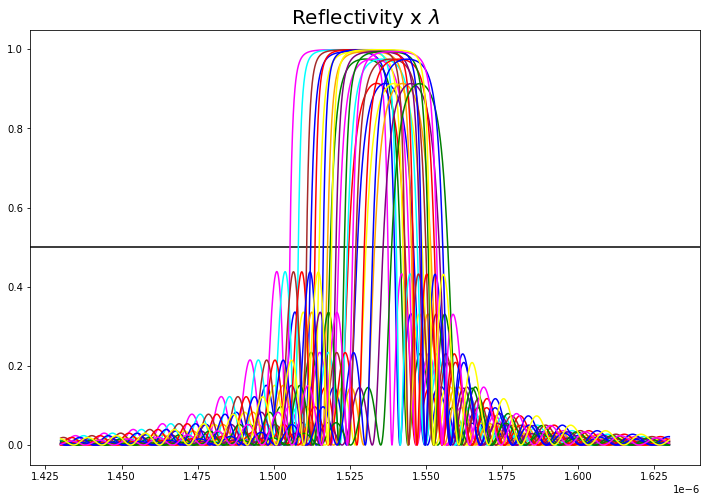

In [222]:

plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)
# plt.legend()

for i in range(nSimu1):
    for j in range(nSimu2):
        # plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[i*2 + j], label = "per = "+str(periodVar[j])+", dLarg = "+str(lambdaVar[i]) )
        plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[(i*2 + j)%9])

print(colors)

In [ ]:
3.12e-07 / dLarg 1.7e-07

In [227]:
# nSimu1 = 13
nPontos = 5001
# N = 80
nSimu1 = 5
nSimu2 = 6
# NVar = [60, 70, 80]
# NVar = range(40, 85, 10)
NVar = np.zeros(nSimu1)
for i in range(nSimu1):
    NVar[i] = 10*i + 80
period = 3.12e-07 #312 nm
# dLarg = 107e-9
# periodVar = np.linspace(310e-9, 315e-9, nSimu1)
dLargVar = np.linspace(170e-9, 180e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
bragg.setnamed("structure group", "periodo", period)
bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
bragg.setnamed("mesh", "x max", 1e-6 + period)
# bragg.setnamed("structure group", "dLarg", dLarg)
# bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    bragg.switchtolayout()
    # bragg.setnamed("structure group", "periodo", periodVar[i])
    # bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    # bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        bragg.switchtolayout()
        bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/30
completed: 2/30
completed: 3/30
completed: 4/30
completed: 5/30
completed: 6/30
completed: 7/30
completed: 8/30
completed: 9/30
completed: 10/30
completed: 11/30
completed: 12/30
completed: 13/30
completed: 14/30
completed: 15/30
completed: 16/30
completed: 17/30
completed: 18/30
completed: 19/30
completed: 20/30
completed: 21/30
completed: 22/30
completed: 23/30
completed: 24/30
completed: 25/30
completed: 26/30
completed: 27/30
completed: 28/30
completed: 29/30
completed: 30/30


In [236]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    minX = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    maxX = k+1
                    cont = 0
                    if (lambdaVar[int(maxX)]-lambdaVar[int(minX)] > fwhmMatrix[i][j]):
                        filterLims[i][j][0] = minX
                        filterLims[i][j][1] = maxX

                        fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i])+"\t\t ref_max = "+str(maxR))
        # print("N "+str(NVar[i])+"\t\t ref_max = "+str(maxR))
        # print("dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        # print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        print("N "+str(NVar[i])+" / dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))
        print()


N 80.0 / dLarg 1.7e-07		 ref_max = 0.9999771258047601
lamb C = 1531.47 fwhm = 27.58000000000004

N 80.0 / dLarg 1.7199999999999998e-07		 ref_max = 0.9999771258047601
lamb C = 1530.6100000000001 fwhm = 28.459999999999766

N 80.0 / dLarg 1.74e-07		 ref_max = 0.9999771258047601
lamb C = 1529.69 fwhm = 29.42000000000001

N 80.0 / dLarg 1.76e-07		 ref_max = 0.9999771258047601
lamb C = 1528.8 fwhm = 30.319999999999865

N 80.0 / dLarg 1.78e-07		 ref_max = 0.9999771258047601
lamb C = 1527.8400000000001 fwhm = 31.31999999999994

N 80.0 / dLarg 1.8e-07		 ref_max = 0.9999771258047601
lamb C = 1526.92 fwhm = 32.239999999999924

N 90.0 / dLarg 1.7e-07		 ref_max = 0.9999771258047601
lamb C = 1531.46 fwhm = 26.83999999999994

N 90.0 / dLarg 1.7199999999999998e-07		 ref_max = 0.9999771258047601
lamb C = 1530.6100000000001 fwhm = 27.699999999999964

N 90.0 / dLarg 1.74e-07		 ref_max = 0.9999771258047601
lamb C = 1529.6799999999998 fwhm = 28.67999999999991

N 90.0 / dLarg 1.76e-07		 ref_max = 0.99997712

['red', 'green', 'blue', 'magenta', 'yellow', 'cyan', 'orange', 'brown', 'purple']


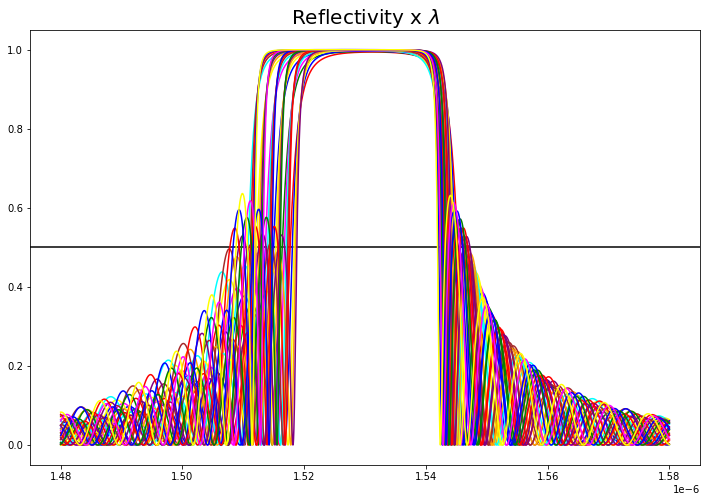

In [229]:

plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)
# plt.legend()

for i in range(nSimu1):
    for j in range(nSimu2):
        # plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[i*2 + j], label = "per = "+str(periodVar[j])+", dLarg = "+str(lambdaVar[i]) )
        plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[(i*2 + j)%9])

print(colors)

['red', 'green', 'blue', 'magenta', 'yellow', 'cyan', 'orange', 'brown', 'purple']


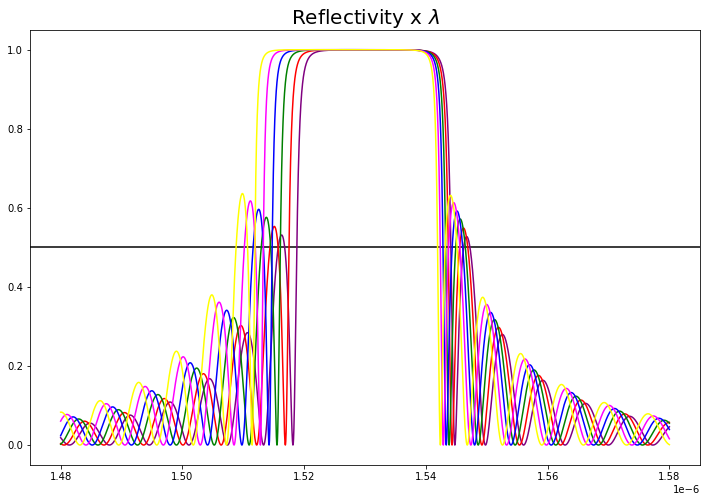

In [232]:

plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)
# plt.legend()

i = nSimu1 - 1
for j in range(nSimu2):
    # plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[i*2 + j], label = "per = "+str(periodVar[j])+", dLarg = "+str(lambdaVar[i]) )
    plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[(i*2 + j)%9])
    # plt.plot(lambdaVar,resultsMatrix[i][j])


print(colors)

In [239]:
# nSimu1 = 13
nPontos = 5001
# N = 80
nSimu1 = 12
nSimu2 = 6
# NVar = [60, 70, 80]
# NVar = range(40, 85, 10)
NVar = np.zeros(nSimu1)
for i in range(nSimu1):
    NVar[i] = i + 124
period = 3.12e-07 #312 nm
# dLarg = 107e-9
# periodVar = np.linspace(310e-9, 315e-9, nSimu1)
dLargVar = np.linspace(170e-9, 175e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
bragg.setnamed("structure group", "periodo", period)
bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
bragg.setnamed("mesh", "x max", 1e-6 + period)
# bragg.setnamed("structure group", "dLarg", dLarg)
# bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    bragg.switchtolayout()
    # bragg.setnamed("structure group", "periodo", periodVar[i])
    # bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    # bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        bragg.switchtolayout()
        bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/72
completed: 2/72
completed: 3/72
completed: 4/72
completed: 5/72
completed: 6/72
completed: 7/72
completed: 8/72
completed: 9/72
completed: 10/72
completed: 11/72
completed: 12/72
completed: 13/72
completed: 14/72
completed: 15/72
completed: 16/72
completed: 17/72
completed: 18/72
completed: 19/72
completed: 20/72
completed: 21/72
completed: 22/72
completed: 23/72
completed: 24/72
completed: 25/72
completed: 26/72
completed: 27/72
completed: 28/72
completed: 29/72
completed: 30/72
completed: 31/72
completed: 32/72
completed: 33/72
completed: 34/72
completed: 35/72
completed: 36/72
completed: 37/72
completed: 38/72
completed: 39/72
completed: 40/72
completed: 41/72
completed: 42/72
completed: 43/72
completed: 44/72
completed: 45/72
completed: 46/72
completed: 47/72
completed: 48/72
completed: 49/72
completed: 50/72
completed: 51/72
completed: 52/72
completed: 53/72
completed: 54/72
completed: 55/72
completed: 56/72
completed: 57/72
completed: 58/72
completed: 59/72
comple

In [240]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    minX = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    maxX = k+1
                    cont = 0
                    if (lambdaVar[int(maxX)]-lambdaVar[int(minX)] > fwhmMatrix[i][j]):
                        filterLims[i][j][0] = minX
                        filterLims[i][j][1] = maxX

                        fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i])+"\t\t ref_max = "+str(maxR))
        # print("N "+str(NVar[i])+"\t\t ref_max = "+str(maxR))
        # print("dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        # print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        print("N "+str(NVar[i])+" / dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))
        print()
    print("\n")


N 124.0 / dLarg 1.7e-07		 ref_max = 0.9999801174558567
lamb C = 1531.4499999999998 fwhm = 25.18000000000007

N 124.0 / dLarg 1.7099999999999998e-07		 ref_max = 0.9999801174558567
lamb C = 1530.98 fwhm = 25.60000000000002

N 124.0 / dLarg 1.7199999999999998e-07		 ref_max = 0.9999801174558567
lamb C = 1530.5900000000001 fwhm = 26.06000000000001

N 124.0 / dLarg 1.73e-07		 ref_max = 0.9999801174558567
lamb C = 1530.09 fwhm = 26.620000000000008

N 124.0 / dLarg 1.74e-07		 ref_max = 0.9999801174558567
lamb C = 1529.66 fwhm = 27.039999999999957

N 124.0 / dLarg 1.75e-07		 ref_max = 0.9999801174558567
lamb C = 1529.18 fwhm = 27.480000000000032



N 125.0 / dLarg 1.7e-07		 ref_max = 0.9999801174558567
lamb C = 1531.45 fwhm = 25.139999999999812

N 125.0 / dLarg 1.7099999999999998e-07		 ref_max = 0.9999801174558567
lamb C = 1530.98 fwhm = 25.559999999999974

N 125.0 / dLarg 1.7199999999999998e-07		 ref_max = 0.9999801174558567
lamb C = 1530.59 fwhm = 26.019999999999964

N 125.0 / dLarg 1.73e-07	

['red', 'green', 'blue', 'magenta', 'yellow', 'cyan', 'orange', 'brown', 'purple']


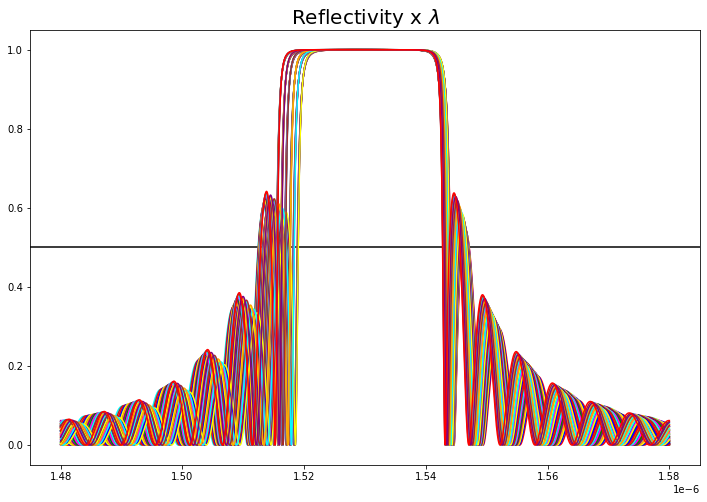

In [241]:

plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)
# plt.legend()

for i in range(nSimu1):
    for j in range(nSimu2):
        # plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[i*2 + j], label = "per = "+str(periodVar[j])+", dLarg = "+str(lambdaVar[i]) )
        plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[(i*2 + j)%9])

print(colors)

In [243]:
# nSimu1 = 13
nPontos = 5001
# N = 80
nSimu1 = 4
nSimu2 = 1
# NVar = [60, 70, 80]
# NVar = range(40, 85, 10)
NVar = np.zeros(nSimu1)
for i in range(nSimu1):
    NVar[i] = 5*i + 135
period = 3.12e-07 #312 nm
dLarg = 173e-9
# periodVar = np.linspace(310e-9, 315e-9, nSimu1)
# dLargVar = np.linspace(170e-9, 175e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
bragg.setnamed("structure group", "periodo", period)
bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
bragg.setnamed("mesh", "x max", 1e-6 + period)
bragg.setnamed("structure group", "dLarg", dLarg)
# bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    bragg.switchtolayout()
    # bragg.setnamed("structure group", "periodo", periodVar[i])
    # bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    # bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        # bragg.switchtolayout()
        # bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/4
completed: 2/4
completed: 3/4
completed: 4/4


In [244]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    minX = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    maxX = k+1
                    cont = 0
                    if (lambdaVar[int(maxX)]-lambdaVar[int(minX)] > fwhmMatrix[i][j]):
                        filterLims[i][j][0] = minX
                        filterLims[i][j][1] = maxX

                        fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i])+"\t\t ref_max = "+str(maxR))
        print("N "+str(NVar[i])+"\t\t ref_max = "+str(maxR))
        # print("dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        # print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        # print("N "+str(NVar[i])+" / dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))
        print()
    print("\n")


N 135.0		 ref_max = 0.9999906373384331
lamb C = 1530.08 fwhm = 26.27999999999994



N 140.0		 ref_max = 0.9999906373384331
lamb C = 1530.0900000000001 fwhm = 26.1400000000001



N 145.0		 ref_max = 0.9999906373384331
lamb C = 1530.09 fwhm = 26.019999999999964



N 150.0		 ref_max = 0.9999906373384331
lamb C = 1530.08 fwhm = 25.919999999999956





['red', 'green', 'blue', 'magenta', 'yellow', 'cyan', 'orange', 'brown', 'purple']


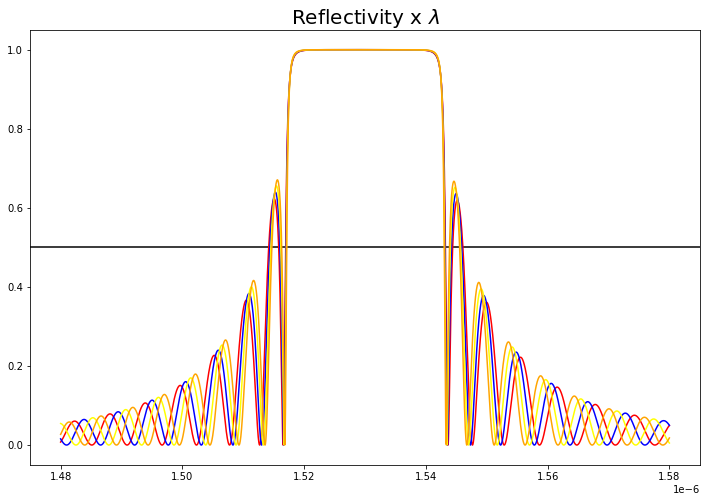

In [245]:

plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)
# plt.legend()

for i in range(nSimu1):
    for j in range(nSimu2):
        # plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[i*2 + j], label = "per = "+str(periodVar[j])+", dLarg = "+str(lambdaVar[i]) )
        plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[(i*2 + j)%9])

print(colors)

In [246]:
# nSimu1 = 13
nPontos = 5001
N = 120
nSimu1 = 3
nSimu2 = 6
# NVar = [60, 70, 80]
# NVar = range(40, 85, 10)
# NVar = np.zeros(nSimu1)
# for i in range(nSimu1):
#     NVar[i] = 5*i + 135
# period = 3.12e-07 #312 nm
# dLarg = 173e-9
periodVar = np.linspace(310e-9, 312e-9, nSimu1)
dLargVar = np.linspace(165e-9, 170e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
# bragg.setnamed("structure group", "periodo", period)
# bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
# bragg.setnamed("mesh", "x max", 1e-6 + period)
# bragg.setnamed("structure group", "dLarg", dLarg)
bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "periodo", periodVar[i])
    bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    # bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        bragg.switchtolayout()
        bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/18
completed: 2/18
completed: 3/18
completed: 4/18
completed: 5/18
completed: 6/18
completed: 7/18
completed: 8/18
completed: 9/18
completed: 10/18
completed: 11/18
completed: 12/18
completed: 13/18
completed: 14/18
completed: 15/18
completed: 16/18
completed: 17/18
completed: 18/18


In [247]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    minX = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    maxX = k+1
                    cont = 0
                    if (lambdaVar[int(maxX)]-lambdaVar[int(minX)] > fwhmMatrix[i][j]):
                        filterLims[i][j][0] = minX
                        filterLims[i][j][1] = maxX

                        fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i])+"\t\t ref_max = "+str(maxR))
        # print("N "+str(NVar[i])+"\t\t ref_max = "+str(maxR))
        # print("dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        # print("N "+str(NVar[i])+" / dLarg "+str(dLargVar[j])+"\t\t ref_max = "+str(maxR))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))
        print()
    print("\n")


periodo 3.1e-07 / dLarg 1.65e-07		 ref_max = 0.9997685760470375
lamb C = 1527.9899999999998 fwhm = 23.140000000000086

periodo 3.1e-07 / dLarg 1.66e-07		 ref_max = 0.9997685760470375
lamb C = 1527.6 fwhm = 23.51999999999999

periodo 3.1e-07 / dLarg 1.67e-07		 ref_max = 0.9997685760470375
lamb C = 1527.1599999999999 fwhm = 23.92000000000002

periodo 3.1e-07 / dLarg 1.68e-07		 ref_max = 0.9997685760470375
lamb C = 1526.79 fwhm = 24.3799999999998

periodo 3.1e-07 / dLarg 1.69e-07		 ref_max = 0.9997685760470375
lamb C = 1526.3000000000002 fwhm = 24.91999999999988

periodo 3.1e-07 / dLarg 1.7e-07		 ref_max = 0.9997685760470375
lamb C = 1525.9 fwhm = 25.31999999999991



periodo 3.1099999999999997e-07 / dLarg 1.65e-07		 ref_max = 0.9997685760470375
lamb C = 1530.79 fwhm = 23.140000000000086

periodo 3.1099999999999997e-07 / dLarg 1.66e-07		 ref_max = 0.9997685760470375
lamb C = 1530.3899999999999 fwhm = 23.540000000000116

periodo 3.1099999999999997e-07 / dLarg 1.67e-07		 ref_max = 0.9997685

['red', 'green', 'blue', 'magenta', 'yellow', 'cyan', 'orange', 'brown', 'purple']


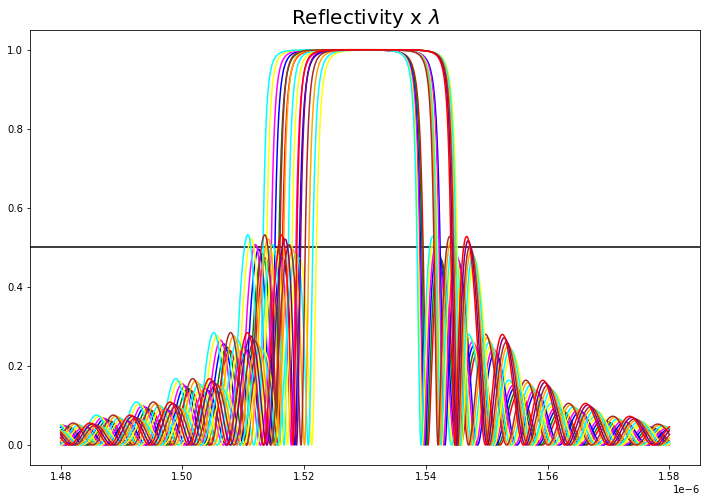

In [248]:

plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)
# plt.legend()

for i in range(nSimu1):
    for j in range(nSimu2):
        # plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[i*2 + j], label = "per = "+str(periodVar[j])+", dLarg = "+str(lambdaVar[i]) )
        plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[(i*2 + j)%9])

print(colors)

In [249]:
N = 120
period = 311e-9
dLarg = 169e-9

### Final results

In [250]:
N = 120
period = 311e-9
dLarg = 169e-9

In [259]:
N = 120
period = 311e-9
Largura = 600e-9
dLarg = 169e-9

bragg.switchtolayout()
bragg.setnamed("structure group", "periodo", period)
bragg.setnamed("structure group", "Largura", Largura)
bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
bragg.setnamed("mesh", "x max", 1e-6 + period)
bragg.setnamed("structure group", "dLarg", dLarg)
bragg.setnamed("EME","periods", np.transpose([1,N,1]))


bragg.run()
bragg.emepropagate()

bragg.setemeanalysis("wavelength sweep",1)
bragg.setemeanalysis("start wavelength",1.48e-6)
bragg.setemeanalysis("stop wavelength",1.58e-6)
bragg.setemeanalysis("number of wavelength points",nPontos)
bragg.emesweep("wavelength sweep")

Text(0.5, 1.0, 'Reflectivity x $\\lambda$')

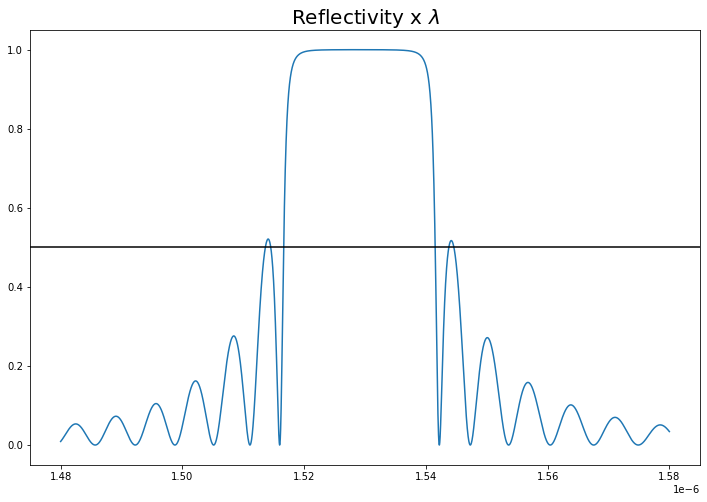

In [253]:
sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
plt.figure(figsize=(12, 8))
plt.plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2)
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)

# for i in range(1001):
#     if abs(sweepResultMatrix['s11'][i])**2 > 0.5:
#         print(i)
#         break
# for i in range(315, 1001):
#     if abs(sweepResultMatrix['s11'][i])**2 < 0.5:
#         print(i)
#         break

# lambL = sweepResultMatrix['wavelength'][315][0]
# lambH = sweepResultMatrix['wavelength'][461][0]
# plt.axvline(x = lambL, color = 'black')
# plt.axvline(x = lambH, color = 'black')

# print('Dlamb = ' + str((lambH - lambL)*1e9) + " nm")
# print('lamb = ' + str((lambH + lambL)*0.5e9) + " nm")

##### trash

In [ ]:
# nSimu1 = 13
nPontos = 5001
# N = 75
nSimu1 = 5
nSimu2 = 1
# NVar = [60, 70, 80]
# NVar = range(40, 85, 10)
NVar = [40, 50, 60, 70, 80]
period = 3.01e-07 #301 nm
dLarg = 51e-9
# periodVar = np.linspace(300e-9, 305e-9, nSimu1)
# dLargVar = np.linspace(40e-9, 60e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
bragg.setnamed("structure group", "periodo", period)
bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
bragg.setnamed("mesh", "x max", 1e-6 + period)
bragg.setnamed("structure group", "dLarg", dLarg)
# bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    bragg.switchtolayout()
    # bragg.setnamed("structure group", "periodo", periodVar[i])
    # bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    # bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        # bragg.switchtolayout()
        # bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/66
completed: 2/66
completed: 3/66
completed: 4/66
completed: 5/66
completed: 6/66
completed: 7/66
completed: 8/66
completed: 9/66
completed: 10/66
completed: 11/66
completed: 12/66
completed: 13/66
completed: 14/66
completed: 15/66
completed: 16/66
completed: 17/66
completed: 18/66
completed: 19/66
completed: 20/66
completed: 21/66
completed: 22/66
completed: 23/66
completed: 24/66
completed: 25/66
completed: 26/66
completed: 27/66
completed: 28/66
completed: 29/66
completed: 30/66
completed: 31/66
completed: 32/66
completed: 33/66
completed: 34/66
completed: 35/66
completed: 36/66
completed: 37/66
completed: 38/66
completed: 39/66
completed: 40/66
completed: 41/66
completed: 42/66
completed: 43/66
completed: 44/66
completed: 45/66
completed: 46/66
completed: 47/66
completed: 48/66
completed: 49/66
completed: 50/66
completed: 51/66
completed: 52/66
completed: 53/66
completed: 54/66
completed: 55/66
completed: 56/66
completed: 57/66
completed: 58/66
completed: 59/66
comple

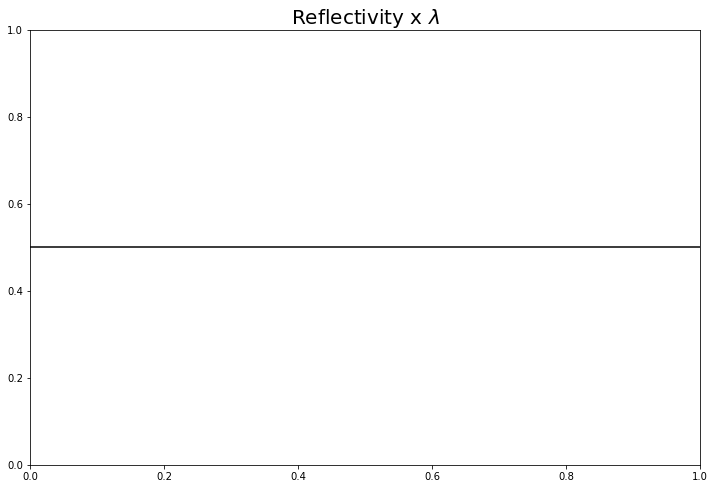

In [111]:
# nSimu1 = 13
nPontos = 5001
N = 80
nSimu1 = 6
nSimu2 = 11
periodVar = np.linspace(300e-9, 305e-9, nSimu1)
dLargVar = np.linspace(45e-9, 55e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)




for i in range(nSimu1):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "periodo", periodVar[i])
    bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])

    for j in range(nSimu2):
        bragg.switchtolayout()
        bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))
    

In [113]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > 0.5:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < 0.5:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        # print("periodo "+str(periodVar[i][j]))
        print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

periodo 3e-07 / dLarg 4.5e-08
lamb C = 1480.0 fwhm = 0.0
periodo 3e-07 / dLarg 4.6e-08
lamb C = 1480.0 fwhm = 0.0
periodo 3e-07 / dLarg 4.7e-08
lamb C = 1480.0 fwhm = 0.0
periodo 3e-07 / dLarg 4.8e-08
lamb C = 1480.0 fwhm = 0.0
periodo 3e-07 / dLarg 4.9e-08
lamb C = 1480.0 fwhm = 0.0
periodo 3e-07 / dLarg 5e-08
lamb C = 1480.0 fwhm = 0.0
periodo 3e-07 / dLarg 5.1e-08
lamb C = 1480.0 fwhm = 0.0
periodo 3e-07 / dLarg 5.2e-08
lamb C = 1480.0 fwhm = 0.0
periodo 3e-07 / dLarg 5.3e-08
lamb C = 1480.0 fwhm = 0.0
periodo 3e-07 / dLarg 5.4e-08
lamb C = 1480.0 fwhm = 0.0
periodo 3e-07 / dLarg 5.5e-08
lamb C = 1480.0 fwhm = 0.0
periodo 3.1e-07 / dLarg 4.5e-08
lamb C = 1481.38 fwhm = 2.759999999999953
periodo 3.1e-07 / dLarg 4.6e-08
lamb C = 1481.29 fwhm = 2.5800000000000667
periodo 3.1e-07 / dLarg 4.7e-08
lamb C = 1481.12 fwhm = 2.239999999999999
periodo 3.1e-07 / dLarg 4.8e-08
lamb C = 1481.03 fwhm = 2.0599999999999006
periodo 3.1e-07 / dLarg 4.9e-08
lamb C = 1480.9025000000001 fwhm = 1.80500000

In [ ]:


plt.figure(figsize=(12, 8))
plt.plot(sweepResultMatrix2['wavelength'],abs(sweepResultMatrix2['s11'])**2)
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)

In [ ]:

for i in range(nSimu):
    bragg.switchtolayout()

    bragg.setnamed("structure group", "dLarg", deltaLarg[i])
    
    bragg.run()
    bragg.emepropagate()

    bragg.setemeanalysis('wavelength sweep', 1)
    bragg.setemeanalysis('start wavelength', 1.5e-6)
    bragg.setemeanalysis('stop wavelength', 1.6e-6)
    bragg.setemeanalysis('number of wavelength points', 100)

    bragg.emesweep('wavelength sweep')

    wave = bragg.getemesweep('S_wavelength_sweep')

    lmbd = wave['wavelength']*1e6

    s21[:,i] = abs(wave['s21'])**2
    s31[:,i] = abs(wave['s31'])**2
    s41[:,i] = abs(wave['s41'])**2

    print('Completed = {}/{}'.format(i+1,nSimu))

### Theoretical values

In [ ]:
lamb = 1530e-9
Dlamb = 25e-9
neff = 2.458
ng = 4.294
c = 299792458
dlambda = np.linspace(lamb - 2e-9, lamb + 2e-9, 40000)

In [187]:
Tperiod = lamb/(2*neff)
theoN = 60
length = Tperiod*theoN
print("Tperiod = " + str(Tperiod*1e9) + " nm")
kappa = np.sqrt((np.pi*ng*Dlamb/(lamb**2))**2 - (np.pi/length)**2)
print("kappa = " + str(kappa))
r_max = np.tanh(kappa*length)**2
print("r_max = " + str(r_max))
dneff = lamb*kappa/2
print("dneff = " + str(dneff))

Tperiod = 528.6800276434001 nm
kappa = 118191.50678845317
r_max = 0.9977862605128408
dneff = 0.09041650269316667


### 2nd try

In [189]:
# nSimu1 = 13
nPontos = 5001
N = 70
nSimu1 = 8
nSimu2 = 1
# NVar = [60, 70, 80]
# NVar = range(40, 85, 10)
# NVar = np.zeros(nSimu1)
# for i in range(nSimu1):
#     NVar[i] = 10*i + 30
# period = 3.01e-07 #301 nm
dLarg = 51e-9
# periodVar = np.linspace(301e-9, 350e-9, nSimu1)
periodVar = [300e-9, 350e-9, 380e-9, 420e-9, 480e-9, 510e-9, 530e-9, 550e-9]
# dLargVar = np.linspace(51e-9, 70e-9, nSimu2)
resultsMatrix = np.zeros((nSimu1, nSimu2, nPontos))
lambdaMatrix = np.zeros((nSimu1, nSimu2, nPontos, 1))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)

# figure,ax=plt.subplots(6, 2, figsize=(24,48))
# plt.figure(figsize=(12, 8))
# plt.axhline(y = 1/2, color = 'black')
# plt.title(r"Reflectivity x $\lambda$",fontsize=20)
bragg.switchtolayout()
# bragg.setnamed("structure group", "periodo", period)
# bragg.setnamed("EME", "group spans", np.transpose([(3e-6, period/4, period/2, period/4, 3e-6)]))
# bragg.setnamed("mesh", "x max", 1e-6 + period)
bragg.setnamed("structure group", "dLarg", dLarg)
bragg.setnamed("EME","periods", np.transpose([1,N,1]))




for i in range(nSimu1):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "periodo", periodVar[i])
    bragg.setnamed("EME", "group spans", np.transpose([(3e-6, periodVar[i]/4, periodVar[i]/2, periodVar[i]/4, 3e-6)]))
    bragg.setnamed("mesh", "x max", 1e-6 + periodVar[i])
    # bragg.setnamed("EME","periods", np.transpose([1,NVar[i],1]))

    for j in range(nSimu2):
        # bragg.switchtolayout()
        # bragg.setnamed("structure group", "dLarg", dLargVar[j])
                
        bragg.run()
        bragg.emepropagate()

        bragg.setemeanalysis("wavelength sweep",1)
        bragg.setemeanalysis("start wavelength",1.48e-6)
        bragg.setemeanalysis("stop wavelength",1.58e-6)
        bragg.setemeanalysis("number of wavelength points",nPontos)
        bragg.emesweep("wavelength sweep")
        sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
        resultsMatrix[i][j] = abs(sweepResultMatrix['s11'])**2
        lambdaMatrix[i][j] = sweepResultMatrix['wavelength']



        print("completed: "+str(nSimu2*i+j+1)+"/"+str(nSimu1*nSimu2))

completed: 1/8
completed: 2/8
completed: 3/8
completed: 4/8
completed: 5/8
completed: 6/8
completed: 7/8
completed: 8/8


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


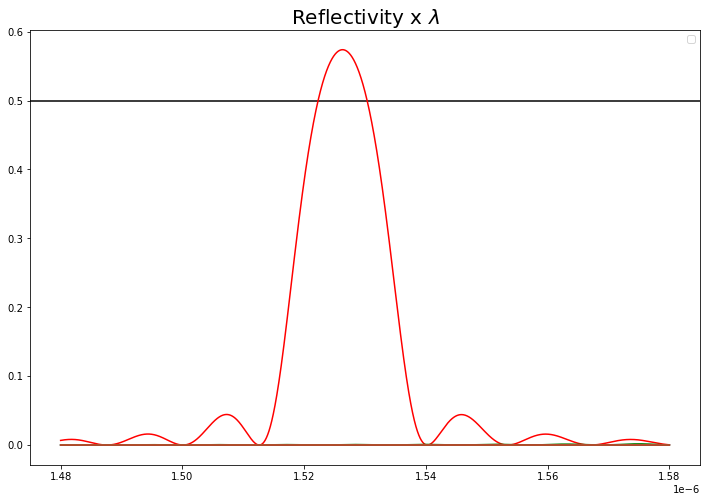

In [190]:

plt.figure(figsize=(12, 8))
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)
plt.legend()

for i in range(nSimu1):
    for j in range(nSimu2):
        # plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[i*2 + j], label = "per = "+str(periodVar[j])+", dLarg = "+str(lambdaVar[i]) )
        plt.plot(lambdaVar,resultsMatrix[i][j], c = colors[(i*nSimu2 + j)%9])


In [192]:
filterLims = np.zeros((nSimu1, nSimu2, 2))
fwhmMatrix = np.zeros((nSimu1, nSimu2))
lambdaVar = np.linspace(1.48e-6, 1.58e-6, nPontos)
for i in range(nSimu1):
    for j in range(nSimu2):
        maxR = 0
        minX = 0
        maxX = 0
        cont = 0
        for k in range(nPontos):
            if resultsMatrix[i][j][k] > maxR:
                maxR = resultsMatrix[i][j][k]
        refC = maxR/2
        for k in range(nPontos-1):
            if resultsMatrix[i][j][k+1] > refC:
                if cont == 0:
                    filterLims[i][j][0] = k
                    cont = 1
            if resultsMatrix[i][j][k+1] < refC:
                if cont == 1:
                    filterLims[i][j][1] = k+1
                    cont = 2
                    fwhmMatrix[i][j] = lambdaVar[int(filterLims[i][j][1])] - lambdaVar[int(filterLims[i][j][0])]


for i in range(nSimu1):
    for j in range(nSimu2):
        print("periodo "+str(periodVar[i]))
        # print("N "+str(NVar[i]))
        # print("dLarg "+str(dLargVar[j]))
        # print("periodo "+str(periodVar[i])+" / dLarg "+str(dLargVar[j]))
        print("lamb C = "+str((lambdaVar[int(filterLims[i][j][0])]*1e9 + lambdaVar[int(filterLims[i][j][1])]*1e9)/2)+" fwhm = "+str(fwhmMatrix[i][j]*1e9))

periodo 3e-07
lamb C = 1526.35 fwhm = 15.539999999999939
periodo 3.5e-07
lamb C = 1539.65 fwhm = 1.3799999999999766
periodo 3.8e-07
lamb C = 1507.51 fwhm = 1.420000000000022
periodo 4.2e-07
lamb C = 1485.1299999999999 fwhm = 1.5799999999999916
periodo 4.8e-07
lamb C = 1482.35 fwhm = 3.020000000000142
periodo 5.1e-07
lamb C = 1484.87 fwhm = 3.259999999999991
periodo 5.3e-07
lamb C = 1484.02 fwhm = 3.52000000000018
periodo 5.5e-07
lamb C = 1483.23 fwhm = 3.4199999999999604
